## Does education influence crime?

Beginning in 2005, the DOE began using the New York State method of calculating graduation rates. The first graduation cohort affected was the Cohort of 2001, which graduated in 2005.
The cohort consists of all students who first entered grade 9 in a given school year. First year of high school.
Graduates are defined as those students earning either a Local or Regents diploma.

in order to understand the level of education for a certain borough in New York city, we look at:
- gradutation rates % : Graduates are defined as those students earning either a Local or Regents diploma




### First source: graduation rate per neighbourhood in NYC per school year


In [2]:
# import all the libraries we will use
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import psycopg2

## NYC Public Schools data source

Overview of the data set:
- Borough: borough name from NYC
- Category: ethnicity, gender, poverty...
- Cohort year: entered year on grade 9th
- Cohort: year path type: either graduated in August or June and 4/5 or 6 year path graduate
- Regents: are statewide standardized examinations in core high school subjects. Students are required to pass these exams to earn a Regents Diploma
- advanced regents diploma: lets students show additional skills in math, science and languages other than english
- local: students that meet specific criteria with lower exam scores

- % grad + % still enrolled + % dropout + % SACC(IEP diploma) + %TASC(GED) = 100%

In [3]:
sheet_names = pd.read_excel('data/graduation_rates_borough.xlsx', sheet_name=None)
#sheet_names.keys()
del sheet_names["Ever ELL"]

In [4]:
sheet_names.keys()

dict_keys(['All', 'ELL', 'SWD', 'Ethnicity', 'Gender', 'Poverty', 'NOTES'])

In [5]:
# Read excel file and create dict object, containing all sheets
# Create a data frame for every sheet
for name in sheet_names:
    # For every sheet in the workbook, create a new data frame
    exec(f"graduates_{name} = pd.DataFrame(sheet_names[name])")
    # Show the name of the sheet and its data frame created
    print(f"Created 'graduates_{name}' from '{name}' sheet.")


Created 'graduates_All' from 'All' sheet.
Created 'graduates_ELL' from 'ELL' sheet.
Created 'graduates_SWD' from 'SWD' sheet.
Created 'graduates_Ethnicity' from 'Ethnicity' sheet.
Created 'graduates_Gender' from 'Gender' sheet.
Created 'graduates_Poverty' from 'Poverty' sheet.
Created 'graduates_NOTES' from 'NOTES' sheet.


In [6]:
sheet_names_2 = pd.read_excel('data/graduation_rates_borough_2.xlsx', sheet_name=None)
del sheet_names_2["Ever ELL"]



In [7]:
sheet_names_2.keys()

dict_keys(['NOTES', 'All', 'ELL', 'SWD', 'Ethnicity', 'Gender', 'Poverty'])

In [8]:
# Read excel file and create dict object, containing all sheets
# Create a data frame for every sheet

for name in sheet_names_2:
    # For every sheet in the workbook, create a new data frame
    exec(f"graduates_2_{name} = pd.DataFrame(sheet_names_2[name])")
    # Show the name of the sheet and its data frame created
    print(f"Created 'graduates_2_{name}' from '{name}' sheet.")


Created 'graduates_2_NOTES' from 'NOTES' sheet.
Created 'graduates_2_All' from 'All' sheet.
Created 'graduates_2_ELL' from 'ELL' sheet.
Created 'graduates_2_SWD' from 'SWD' sheet.
Created 'graduates_2_Ethnicity' from 'Ethnicity' sheet.
Created 'graduates_2_Gender' from 'Gender' sheet.
Created 'graduates_2_Poverty' from 'Poverty' sheet.


In [9]:
graduates_All.columns

Index(['Borough', 'Category', 'Cohort Year', 'Cohort', '# Total Cohort',
       '# Grads', '% Grads', '# Total Regents', '% Total Regents of Cohort',
       '% Total Regents of Grads', '# Advanced Regents',
       '% Advanced Regents of Cohort', '% Advanced Regents of Grads',
       '# Regents without Advanced', '% Regents without Advanced of Cohort',
       '% Regents without Advanced of Grads', '# Local', '% Local of Cohort',
       '% Local of Grads', '# Still Enrolled', '% Still Enrolled', '# Dropout',
       '% Dropout', '# SACC (IEP Diploma)', '% SACC (IEP Diploma) of Cohort',
       '# TASC (GED)', '% TASC (GED) of Cohort'],
      dtype='object')

In [10]:
full_graduates = pd.concat([graduates_Ethnicity,graduates_Gender,graduates_Poverty,graduates_2_Ethnicity,graduates_2_Gender, graduates_2_Poverty ], ignore_index=True)

## create a csv to get the data 
full_graduates .to_csv('full_graduation_rates_rows.csv', index=False)

In [11]:
full_graduates

,Borough,Category,Cohort Year,Cohort,# Total Cohort,# Grads,% Grads,# Total Regents,% Total Regents of Cohort,% Total Regents of Grads,...,% Local of Cohort,% Local of Grads,# Still Enrolled,% Still Enrolled,# Dropout,% Dropout,# SACC (IEP Diploma),% SACC (IEP Diploma) of Cohort,# TASC (GED),% TASC (GED) of Cohort
0,Bronx,Asian,2015,4 year August,999,923,92.392395,894,89.489487,96.85807,...,2.902903,3.141928,48,4.804805,25,2.502502,1,0.1001,2,0.2002
1,Bronx,Asian,2014,4 year August,968,866,89.462807,839,86.673553,96.882217,...,2.789256,3.117783,71,7.334711,29,2.995868,1,0.103306,1,0.103306
2,Bronx,Asian,2013,4 year August,883,801,90.713478,784,88.788223,97.877655,...,1.925255,2.122347,56,6.342016,23,2.604757,2,0.226501,1,0.11325
3,Bronx,Asian,2012,4 year August,981,876,89.296638,855,87.15596,97.602737,...,2.140673,2.39726,70,7.135576,31,3.160041,2,0.203874,2,0.203874
4,Bronx,Asian,2011,4 year August,957,841,87.878784,827,86.415886,98.335312,...,1.462905,1.664685,81,8.46395,30,3.134796,4,0.417973,1,0.104493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052,Staten Island,Not Econ Disadv,2016,6 year June,1981,1871,94.44725,1847,93.235741,98.717262,...,1.211509,1.282737,19,0.959112,71,3.584049,3,0.151439,17,0.858152
5053,Staten Island,Not Econ Disadv,2015,6 year June,1870,1726,92.299469,1559,83.36898,90.324448,...,8.930481,9.67555,41,2.192513,77,4.117647,3,0.160428,23,1.229946
5054,Staten Island,Not Econ Disadv,2014,6 year June,2022,1816,89.812065,1646,81.404549,90.638763,...,8.407517,9.361234,52,2.571711,125,6.181998,6,0.296736,23,1.137488
5055,Staten Island,Not Econ Disadv,2013,6 year June,2236,1985,88.774597,1810,80.94812,91.183876,...,7.826476,8.816121,56,2.504472,150,6.708408,11,0.49195,34,1.520572


In [12]:
full_graduates['Borough'].value_counts()

Borough
Bronx            984
Brooklyn         984
Manhattan        979
Queens           979
Staten Island    973
District 79      158
Name: count, dtype: int64

## Data cleansing

In [ ]:
def clean_orders(orders):
    ''' 
    This function will
    '''

    # change column names to lower
    orders.columns = orders.columns.str.lower()    

    # change column case and spaces to "_"                   
    orders.columns = orders.columns.str.replace(" ","_")

    # drop NAs                   
    orders.dropna(subset=["postal_code"], inplace=True)

    # drop the "index" column as it doe snot add any value
    orders.drop("index", axis= 1,  inplace=True)

    # drop duplicates
    orders.drop_duplicates(inplace=True)

    # change order_date to date format
    orders["order_date"] = pd.to_datetime(orders['order_date'], format='%d/%m/%Y')
    orders ["order_date"]

    # change postcode to str
    orders["postal_code"] = pd.Series(orders["postal_code"], dtype="str")
    orders["postal_code"]= orders["postal_code"].str.replace(".0","")


# Returned the modified DataFrame
    return orders

In [13]:
#create a function to adjust the column names
full_graduates.columns = full_graduates.columns.str.lower()
full_graduates.columns = full_graduates.columns.str.strip()
# change column case and spaces to "_"                   
full_graduates.columns = full_graduates.columns.str.replace(" ","_")
full_graduates.columns

Index(['borough', 'category', 'cohort_year', 'cohort', '#_total_cohort',
       '#_grads', '%_grads', '#_total_regents', '%_total_regents_of_cohort',
       '%_total_regents_of_grads', '#_advanced_regents',
       '%_advanced_regents_of_cohort', '%_advanced_regents_of_grads',
       '#_regents_without_advanced', '%_regents_without_advanced_of_cohort',
       '%_regents_without_advanced_of_grads', '#_local', '%_local_of_cohort',
       '%_local_of_grads', '#_still_enrolled', '%_still_enrolled', '#_dropout',
       '%_dropout', '#_sacc_(iep_diploma)', '%_sacc_(iep_diploma)_of_cohort',
       '#_tasc_(ged)', '%_tasc_(ged)_of_cohort'],
      dtype='object')

In [14]:
# check for null or any missing data
# we can see certain columns have missing values
full_graduates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5057 entries, 0 to 5056
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   borough                               5057 non-null   object
 1   category                              5057 non-null   object
 2   cohort_year                           5057 non-null   int64 
 3   cohort                                5057 non-null   object
 4   #_total_cohort                        5057 non-null   int64 
 5   #_grads                               5057 non-null   object
 6   %_grads                               5057 non-null   object
 7   #_total_regents                       5057 non-null   object
 8   %_total_regents_of_cohort             5057 non-null   object
 9   %_total_regents_of_grads              5050 non-null   object
 10  #_advanced_regents                    5057 non-null   object
 11  %_advanced_regents_of_cohort  

In [15]:
# certain columns are missing some values
full_graduates.isnull().sum()

borough                                 0
category                                0
cohort_year                             0
cohort                                  0
#_total_cohort                          0
#_grads                                 0
%_grads                                 0
#_total_regents                         0
%_total_regents_of_cohort               0
%_total_regents_of_grads                7
#_advanced_regents                      0
%_advanced_regents_of_cohort            0
%_advanced_regents_of_grads             7
#_regents_without_advanced              0
%_regents_without_advanced_of_cohort    0
%_regents_without_advanced_of_grads     7
#_local                                 0
%_local_of_cohort                       0
%_local_of_grads                        7
#_still_enrolled                        0
%_still_enrolled                        0
#_dropout                               0
%_dropout                               0
#_sacc_(iep_diploma)              

In [16]:
full_graduates[full_graduates['%_total_regents_of_grads'].isnull()]

,borough,category,cohort_year,cohort,#_total_cohort,#_grads,%_grads,#_total_regents,%_total_regents_of_cohort,%_total_regents_of_grads,...,%_local_of_cohort,%_local_of_grads,#_still_enrolled,%_still_enrolled,#_dropout,%_dropout,#_sacc_(iep_diploma),%_sacc_(iep_diploma)_of_cohort,#_tasc_(ged),%_tasc_(ged)_of_cohort
761,District 79,Black,2006,4 year August,6,0,0,0,0,NaN,...,0,NaN,2,33.333332,4,66.666664,0,0,0,0
763,District 79,Black,2006,4 year June,6,0,0,0,0,NaN,...,0,NaN,2,33.333332,4,66.666664,0,0,0,0
779,District 79,Hispanic,2005,4 year August,20,0,0,0,0,NaN,...,0,NaN,4,20,15,75,0,0,1,5
781,District 79,Hispanic,2005,4 year June,20,0,0,0,0,NaN,...,0,NaN,4,20,15,75,0,0,1,5
786,District 79,Hispanic,2005,5 year June,22,0,0,0,0,NaN,...,0,NaN,5,22.727272,17,77.272728,0,0,0,0
809,District 79,Native American,2001,4 year June,27,0,0,0,0,NaN,...,0,NaN,10,37.037037,17,62.962963,0,0,0,0
1413,Queens,Multi-Racial,2002,4 year June,7,0,0,0,0,NaN,...,0,NaN,7,100,0,0,0,0,0,0


In [17]:
# since the NaNs correspond to a cohort that did not graduate, I will just change it to 0
full_graduates.fillna('0', inplace=True)

In [18]:
# check if there are no missing values
full_graduates.isnull().sum()

borough                                 0
category                                0
cohort_year                             0
cohort                                  0
#_total_cohort                          0
#_grads                                 0
%_grads                                 0
#_total_regents                         0
%_total_regents_of_cohort               0
%_total_regents_of_grads                0
#_advanced_regents                      0
%_advanced_regents_of_cohort            0
%_advanced_regents_of_grads             0
#_regents_without_advanced              0
%_regents_without_advanced_of_cohort    0
%_regents_without_advanced_of_grads     0
#_local                                 0
%_local_of_cohort                       0
%_local_of_grads                        0
#_still_enrolled                        0
%_still_enrolled                        0
#_dropout                               0
%_dropout                               0
#_sacc_(iep_diploma)              

In [19]:
full_graduates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5057 entries, 0 to 5056
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   borough                               5057 non-null   object
 1   category                              5057 non-null   object
 2   cohort_year                           5057 non-null   int64 
 3   cohort                                5057 non-null   object
 4   #_total_cohort                        5057 non-null   int64 
 5   #_grads                               5057 non-null   object
 6   %_grads                               5057 non-null   object
 7   #_total_regents                       5057 non-null   object
 8   %_total_regents_of_cohort             5057 non-null   object
 9   %_total_regents_of_grads              5057 non-null   object
 10  #_advanced_regents                    5057 non-null   object
 11  %_advanced_regents_of_cohort  

Cohort_year:  is the year when they joined the 9th grade
Cohort: cohort graduation 

To get the exact year of graduation I will get the years from the cohort column and sum them up to the cohort_year column


In [20]:
#first create a new column with the n_year from the cohort column// cohort column is a string

full_graduates['year_path'] = full_graduates['cohort'].str[0]

# lets create a new column with the graduation_year
# change year_path to int64

full_graduates['year_path'] = full_graduates['year_path'].astype(int)

full_graduates['graduation_year'] = full_graduates['cohort_year'] + full_graduates['year_path']
full_graduates


,borough,category,cohort_year,cohort,#_total_cohort,#_grads,%_grads,#_total_regents,%_total_regents_of_cohort,%_total_regents_of_grads,...,#_still_enrolled,%_still_enrolled,#_dropout,%_dropout,#_sacc_(iep_diploma),%_sacc_(iep_diploma)_of_cohort,#_tasc_(ged),%_tasc_(ged)_of_cohort,year_path,graduation_year
0,Bronx,Asian,2015,4 year August,999,923,92.392395,894,89.489487,96.85807,...,48,4.804805,25,2.502502,1,0.1001,2,0.2002,4,2019
1,Bronx,Asian,2014,4 year August,968,866,89.462807,839,86.673553,96.882217,...,71,7.334711,29,2.995868,1,0.103306,1,0.103306,4,2018
2,Bronx,Asian,2013,4 year August,883,801,90.713478,784,88.788223,97.877655,...,56,6.342016,23,2.604757,2,0.226501,1,0.11325,4,2017
3,Bronx,Asian,2012,4 year August,981,876,89.296638,855,87.15596,97.602737,...,70,7.135576,31,3.160041,2,0.203874,2,0.203874,4,2016
4,Bronx,Asian,2011,4 year August,957,841,87.878784,827,86.415886,98.335312,...,81,8.46395,30,3.134796,4,0.417973,1,0.104493,4,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052,Staten Island,Not Econ Disadv,2016,6 year June,1981,1871,94.44725,1847,93.235741,98.717262,...,19,0.959112,71,3.584049,3,0.151439,17,0.858152,6,2022
5053,Staten Island,Not Econ Disadv,2015,6 year June,1870,1726,92.299469,1559,83.36898,90.324448,...,41,2.192513,77,4.117647,3,0.160428,23,1.229946,6,2021
5054,Staten Island,Not Econ Disadv,2014,6 year June,2022,1816,89.812065,1646,81.404549,90.638763,...,52,2.571711,125,6.181998,6,0.296736,23,1.137488,6,2020
5055,Staten Island,Not Econ Disadv,2013,6 year June,2236,1985,88.774597,1810,80.94812,91.183876,...,56,2.504472,150,6.708408,11,0.49195,34,1.520572,6,2019


In [21]:
full_graduates

,borough,category,cohort_year,cohort,#_total_cohort,#_grads,%_grads,#_total_regents,%_total_regents_of_cohort,%_total_regents_of_grads,...,#_still_enrolled,%_still_enrolled,#_dropout,%_dropout,#_sacc_(iep_diploma),%_sacc_(iep_diploma)_of_cohort,#_tasc_(ged),%_tasc_(ged)_of_cohort,year_path,graduation_year
0,Bronx,Asian,2015,4 year August,999,923,92.392395,894,89.489487,96.85807,...,48,4.804805,25,2.502502,1,0.1001,2,0.2002,4,2019
1,Bronx,Asian,2014,4 year August,968,866,89.462807,839,86.673553,96.882217,...,71,7.334711,29,2.995868,1,0.103306,1,0.103306,4,2018
2,Bronx,Asian,2013,4 year August,883,801,90.713478,784,88.788223,97.877655,...,56,6.342016,23,2.604757,2,0.226501,1,0.11325,4,2017
3,Bronx,Asian,2012,4 year August,981,876,89.296638,855,87.15596,97.602737,...,70,7.135576,31,3.160041,2,0.203874,2,0.203874,4,2016
4,Bronx,Asian,2011,4 year August,957,841,87.878784,827,86.415886,98.335312,...,81,8.46395,30,3.134796,4,0.417973,1,0.104493,4,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052,Staten Island,Not Econ Disadv,2016,6 year June,1981,1871,94.44725,1847,93.235741,98.717262,...,19,0.959112,71,3.584049,3,0.151439,17,0.858152,6,2022
5053,Staten Island,Not Econ Disadv,2015,6 year June,1870,1726,92.299469,1559,83.36898,90.324448,...,41,2.192513,77,4.117647,3,0.160428,23,1.229946,6,2021
5054,Staten Island,Not Econ Disadv,2014,6 year June,2022,1816,89.812065,1646,81.404549,90.638763,...,52,2.571711,125,6.181998,6,0.296736,23,1.137488,6,2020
5055,Staten Island,Not Econ Disadv,2013,6 year June,2236,1985,88.774597,1810,80.94812,91.183876,...,56,2.504472,150,6.708408,11,0.49195,34,1.520572,6,2019


In [22]:
# lets drop the columns we do not want/ I will drop the district 79 
full_graduates.drop(['#_sacc_(iep_diploma)','%_sacc_(iep_diploma)_of_cohort','#_tasc_(ged)', '%_tasc_(ged)_of_cohort'],axis='columns', inplace= True)
full_graduates = full_graduates[full_graduates.borough != 'District 79']

In [23]:
full_graduates = full_graduates[full_graduates.borough != 'District 79']


In [24]:
full_graduates[full_graduates['borough']=='District 79']

,borough,category,cohort_year,cohort,#_total_cohort,#_grads,%_grads,#_total_regents,%_total_regents_of_cohort,%_total_regents_of_grads,...,%_regents_without_advanced_of_grads,#_local,%_local_of_cohort,%_local_of_grads,#_still_enrolled,%_still_enrolled,#_dropout,%_dropout,year_path,graduation_year


In [25]:
full_graduates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4899 entries, 0 to 5056
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   borough                               4899 non-null   object
 1   category                              4899 non-null   object
 2   cohort_year                           4899 non-null   int64 
 3   cohort                                4899 non-null   object
 4   #_total_cohort                        4899 non-null   int64 
 5   #_grads                               4899 non-null   object
 6   %_grads                               4899 non-null   object
 7   #_total_regents                       4899 non-null   object
 8   %_total_regents_of_cohort             4899 non-null   object
 9   %_total_regents_of_grads              4899 non-null   object
 10  #_advanced_regents                    4899 non-null   object
 11  %_advanced_regents_of_cohort       

In [45]:
# change from column 5 all objects into numbers

# define the columns to convert
columns_to_convert = columns_to_convert = full_graduates.columns[4:]

# Iterate through each column in the list of columns to convert
for col in columns_to_convert:
    # Use try-except to handle columns that cannot be converted to numeric
    try:
        # Convert the values in the column to numeric format
        full_graduates[col] = pd.to_numeric(full_graduates[col], errors='coerce')  # 'coerce' option replaces non-convertible values with NaN
    except:
        print(f"Could not convert column '{col}' to numeric")

# Now the values in the specified columns should be converted to numeric format where possible


In [46]:
# check if the change worked
full_graduates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4899 entries, 0 to 5056
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   borough                               4899 non-null   object 
 1   category                              4899 non-null   object 
 2   cohort_year                           4899 non-null   int64  
 3   cohort                                4899 non-null   object 
 4   #_total_cohort                        4899 non-null   int64  
 5   #_grads                               4899 non-null   float64
 6   %_grads                               4899 non-null   float64
 7   #_total_regents                       4899 non-null   float64
 8   %_total_regents_of_cohort             4899 non-null   float64
 9   %_total_regents_of_grads              4899 non-null   float64
 10  #_advanced_regents                    4899 non-null   float64
 11  %_advanced_regents_of_

In [47]:
full_graduates.isnull().sum()

borough                                 0
category                                0
cohort_year                             0
cohort                                  0
#_total_cohort                          0
#_grads                                 0
%_grads                                 0
#_total_regents                         0
%_total_regents_of_cohort               0
%_total_regents_of_grads                0
#_advanced_regents                      0
%_advanced_regents_of_cohort            0
%_advanced_regents_of_grads             0
#_regents_without_advanced              0
%_regents_without_advanced_of_cohort    0
%_regents_without_advanced_of_grads     0
#_local                                 0
%_local_of_cohort                       0
%_local_of_grads                        0
#_still_enrolled                        0
%_still_enrolled                        0
#_dropout                               0
%_dropout                               0
year_path                         

In [39]:
full_graduates.fillna(0, inplace=True)

In [40]:
full_graduates[full_graduates['#_grads'].isnull()]

,borough,category,cohort_year,cohort,#_total_cohort,#_grads,%_grads,#_total_regents,%_total_regents_of_cohort,%_total_regents_of_grads,...,%_regents_without_advanced_of_grads,#_local,%_local_of_cohort,%_local_of_grads,#_still_enrolled,%_still_enrolled,#_dropout,%_dropout,year_path,graduation_year


### Remember for each year you will get 2 values because of the June/August graduations

## Lets explore the data

In [48]:
full_graduates.head()

,borough,category,cohort_year,cohort,#_total_cohort,#_grads,%_grads,#_total_regents,%_total_regents_of_cohort,%_total_regents_of_grads,...,%_regents_without_advanced_of_grads,#_local,%_local_of_cohort,%_local_of_grads,#_still_enrolled,%_still_enrolled,#_dropout,%_dropout,year_path,graduation_year
0,Bronx,Asian,2015,4 year August,999,923.0,92.392395,894.0,89.489487,96.858070,...,34.561214,29.0,2.902903,3.141928,48.0,4.804805,25.0,2.502502,4,2019
1,Bronx,Asian,2014,4 year August,968,866.0,89.462807,839.0,86.673553,96.882217,...,31.986143,27.0,2.789256,3.117783,71.0,7.334711,29.0,2.995868,4,2018
2,Bronx,Asian,2013,4 year August,883,801.0,90.713478,784.0,88.788223,97.877655,...,31.335831,17.0,1.925255,2.122347,56.0,6.342016,23.0,2.604757,4,2017
3,Bronx,Asian,2012,4 year August,981,876.0,89.296638,855.0,87.155960,97.602737,...,35.616440,21.0,2.140673,2.397260,70.0,7.135576,31.0,3.160041,4,2016
4,Bronx,Asian,2011,4 year August,957,841.0,87.878784,827.0,86.415886,98.335312,...,26.278240,14.0,1.462905,1.664685,81.0,8.463950,30.0,3.134796,4,2015


In [33]:
# lets check for how long is the data
print(full_graduates['graduation_year'].min())
print(full_graduates['graduation_year'].max())

2005
2023


In [34]:
# lets check fot the categorical columns
print(full_graduates['borough'].unique())
print(full_graduates['category'].unique())
print(full_graduates['graduation_year'].unique())

['Bronx' 'Brooklyn' 'Manhattan' 'Queens' 'Staten Island']
['Asian' 'Black' 'Hispanic' 'Multi-Racial' 'Native American' 'White'
 'Female' 'Male' 'Econ Disadv' 'Not Econ Disadv' 'Neither Female nor Male']
[2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009 2008 2007 2006
 2005 2023 2022 2021 2020]


In [35]:
# here i leave an example of how i want my data to show
# Sample DataFrame
data = {
    'Category': ['A', 'A', 'B', 'B', 'A', 'B'],
    'Subcategory': ['X', 'Y', 'X', 'Y', 'X', 'Y'],
    'Value': [10, 20, 30, 40, 50, 60]
}
df = pd.DataFrame(data)

# Group by 'Category' and 'Subcategory' columns and calculate the sum of 'Value' column within each group
result = df.groupby(['Category', 'Subcategory'])['Value'].sum()

print(result)


Category  Subcategory
A         X               60
          Y               20
B         X               30
          Y              100
Name: Value, dtype: int64


## Prepare the dataframe to upload to Postgress

For that we will group the data so that we show all the categories in one table with its corresponding borough and gradution year and count values only because then we calculate our rates.

each cohort has 3 different year paths and each year path has 2 graduation events. June and August so have the total per graduation year I took the latest number incl. august graduates. 

In [49]:
graduation_rates = full_graduates.groupby(['graduation_year','borough','category', 'year_path']).agg({
                                                                                                        '#_total_cohort':'first',
                                                                                                        '#_grads':'first',
                                                                                                        '#_still_enrolled':'first',
                                                                                                        '#_dropout':'first'}).reset_index()
graduation_rates

,graduation_year,borough,category,year_path,#_total_cohort,#_grads,#_still_enrolled,#_dropout
0,2005,Bronx,Asian,4,638,479.0,92.0,60.0
1,2005,Bronx,Black,4,3852,1662.0,1213.0,770.0
2,2005,Bronx,Econ Disadv,4,8217,3831.0,2244.0,1696.0
3,2005,Bronx,Female,4,5532,2711.0,1547.0,1052.0
4,2005,Bronx,Hispanic,4,6150,2261.0,2035.0,1506.0
...,...,...,...,...,...,...,...,...
2687,2023,Staten Island,Not Econ Disadv,5,1886,1778.0,33.0,63.0
2688,2023,Staten Island,Not Econ Disadv,6,1963,1867.0,20.0,63.0
2689,2023,Staten Island,White,4,1929,1788.0,87.0,34.0
2690,2023,Staten Island,White,5,1999,1865.0,43.0,60.0


In [50]:

graduation_rates= graduation_rates.groupby(['graduation_year','borough','category']).agg({
                                                                                                  '#_total_cohort':'sum',
                                                                                                    '#_grads':'sum',
                                                                                                    '#_still_enrolled':'sum',
                                                                                                    '#_dropout':'sum'}).reset_index()

In [51]:
graduation_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   graduation_year   951 non-null    int64  
 1   borough           951 non-null    object 
 2   category          951 non-null    object 
 3   #_total_cohort    951 non-null    int64  
 4   #_grads           951 non-null    float64
 5   #_still_enrolled  951 non-null    float64
 6   #_dropout         951 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 52.1+ KB


In [52]:
graduation_rates[(graduation_rates['graduation_year']==2018) &  (graduation_rates['borough']=='Bronx') & (graduation_rates['category']=='Asian')]

,graduation_year,borough,category,#_total_cohort,#_grads,#_still_enrolled,#_dropout
646,2018,Bronx,Asian,2822,2572.0,123.0,107.0


## Upload the Graduation Rates df to Postgress

In [53]:
# Import get_engine from sql_functions.py. You will need to restart your kernel and rerun at this point since we changed the module since we first imported it.
from sql_functions import get_engine
# create a variable called engine using the get_engine function
engine = get_engine()

In [54]:
# Set the schema to your course name and the table_name variable to 'carriers_' + your initials/group number

schema = 'capstone_crime_nerds' # your course schema name, example 'hh_analytics_22_1
table_name = 'graduation_rates' # Example: 'carriers_pw' for Philipp Wendt

In [55]:
# Write records stored in a dataframe to SQL database
if engine!=None:
    try:
        graduation_rates.to_sql(name='graduation_rates', # Name of SQL table variable
                        con=engine, # Engine or connection
                        schema=schema, # your class schema variable
                        if_exists='replace', # Drop the table before inserting new values 
                        index=False, # Write DataFrame index as a column
                        chunksize=5000, # Specify the number of rows in each batch to be written at a time
                        method='multi') # Pass multiple values in a single INSERT clause
        print(f"The {table_name} table was imported successfully.")
    # Error handling
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        engine = None
else:
    print('No engine')

The graduation_rates table was imported successfully.


In [56]:
from sql_functions import get_dataframe

In [57]:
get_dataframe(f'select count(*) from capstone_crime_nerds.graduation_rates')

,count
0,951


In [58]:
# now lets check how the grouping worked//lets check for one graduation year
graduation_rates[graduation_rates['graduation_year']==2010]

,graduation_year,borough,category,#_total_cohort,#_grads,#_still_enrolled,#_dropout
246,2010,Bronx,Asian,2342,2089.0,98.0,120.0
247,2010,Bronx,Black,15145,9407.0,1947.0,2793.0
248,2010,Bronx,Econ Disadv,33759,22092.0,4289.0,5494.0
249,2010,Bronx,Female,22061,14852.0,2458.0,3771.0
250,2010,Bronx,Hispanic,25715,15061.0,3556.0,5474.0
251,2010,Bronx,Male,23417,13350.0,3365.0,4937.0
252,2010,Bronx,Multi-Racial,113,80.0,14.0,19.0
253,2010,Bronx,Native American,189,105.0,38.0,28.0
254,2010,Bronx,Not Econ Disadv,11719,6110.0,1534.0,3214.0
255,2010,Bronx,White,1974,1460.0,170.0,274.0


In [ ]:
# for that we need to group graduation_rates_ethnicity df per graduation year 


## Understand how the data is displayed

In [59]:
# define the different dataframes filters

filter_ethniticy = ['Asian', 'Black', 'Hispanic', 'Multi-Racial', 'Native American','White']
filter_gender = ['Female', 'Male']
filter_econ_situation = ['Econ Disadv', 'Not Econ Disadv']


### Lets look at ethnicity

In [60]:
graduation_rates

,graduation_year,borough,category,#_total_cohort,#_grads,#_still_enrolled,#_dropout
0,2005,Bronx,Asian,638,479.0,92.0,60.0
1,2005,Bronx,Black,3852,1662.0,1213.0,770.0
2,2005,Bronx,Econ Disadv,8217,3831.0,2244.0,1696.0
3,2005,Bronx,Female,5532,2711.0,1547.0,1052.0
4,2005,Bronx,Hispanic,6150,2261.0,2035.0,1506.0
...,...,...,...,...,...,...,...
946,2023,Staten Island,Multi-Racial,183,160.0,10.0,9.0
947,2023,Staten Island,Native American,72,62.0,3.0,4.0
948,2023,Staten Island,Neither Female nor Male,2,0.0,0.0,0.0
949,2023,Staten Island,Not Econ Disadv,5610,5281.0,118.0,173.0


In [61]:
# first we will need to filter for the categories including th ethnicity filter
graduation_rates_ethnicity= graduation_rates[graduation_rates.category.isin(filter_ethniticy)]
graduation_rates_ethnicity.head()

,graduation_year,borough,category,#_total_cohort,#_grads,#_still_enrolled,#_dropout
0,2005,Bronx,Asian,638,479.0,92.0,60.0
1,2005,Bronx,Black,3852,1662.0,1213.0,770.0
4,2005,Bronx,Hispanic,6150,2261.0,2035.0,1506.0
6,2005,Bronx,Multi-Racial,1,0.0,0.0,0.0
7,2005,Bronx,Native American,56,0.0,0.0,0.0


In [62]:
graduation_rates_ethnicity.isnull().sum()

graduation_year     0
borough             0
category            0
#_total_cohort      0
#_grads             0
#_still_enrolled    0
#_dropout           0
dtype: int64

In [63]:
# now lets check if the grouping is working and sense checking
graduation_rates_ethnicity[(graduation_rates_ethnicity['graduation_year']==2005) & (graduation_rates_ethnicity['borough']=='Bronx')]

,graduation_year,borough,category,#_total_cohort,#_grads,#_still_enrolled,#_dropout
0,2005,Bronx,Asian,638,479.0,92.0,60.0
1,2005,Bronx,Black,3852,1662.0,1213.0,770.0
4,2005,Bronx,Hispanic,6150,2261.0,2035.0,1506.0
6,2005,Bronx,Multi-Racial,1,0.0,0.0,0.0
7,2005,Bronx,Native American,56,0.0,0.0,0.0
9,2005,Bronx,White,756,485.0,153.0,95.0


In [65]:
# create columns for shares for % graduates and % dropout
graduation_rates_ethnicity['graduation_rate'] = graduation_rates_ethnicity['#_grads']/graduation_rates_ethnicity['#_total_cohort']
graduation_rates_ethnicity['dropout_rate'] = graduation_rates_ethnicity['#_dropout']/graduation_rates_ethnicity['#_total_cohort']
graduation_rates_ethnicity

/var/folders/m3/_16y3dv54zv5tjsslshf6n3w0000gn/T/ipykernel_69019/1744038900.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graduation_rates_ethnicity['graduation_rate'] = graduation_rates_ethnicity['#_grads']/graduation_rates_ethnicity['#_total_cohort']
/var/folders/m3/_16y3dv54zv5tjsslshf6n3w0000gn/T/ipykernel_69019/1744038900.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graduation_rates_ethnicity['dropout_rate'] = graduation_rates_ethnicity['#_dropout']/graduation_rates_ethnicity['#_total_coho

,graduation_year,borough,category,#_total_cohort,#_grads,#_still_enrolled,#_dropout,graduation_rate,dropout_rate
0,2005,Bronx,Asian,638,479.0,92.0,60.0,0.750784,0.094044
1,2005,Bronx,Black,3852,1662.0,1213.0,770.0,0.431464,0.199896
4,2005,Bronx,Hispanic,6150,2261.0,2035.0,1506.0,0.367642,0.244878
6,2005,Bronx,Multi-Racial,1,0.0,0.0,0.0,0.000000,0.000000
7,2005,Bronx,Native American,56,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
941,2023,Staten Island,Black,1835,1445.0,100.0,222.0,0.787466,0.120981
944,2023,Staten Island,Hispanic,3779,3069.0,212.0,354.0,0.812120,0.093676
946,2023,Staten Island,Multi-Racial,183,160.0,10.0,9.0,0.874317,0.049180
947,2023,Staten Island,Native American,72,62.0,3.0,4.0,0.861111,0.055556


In [66]:
full_graduates_ethnicity_total = graduation_rates_ethnicity.groupby(['graduation_year','borough']).agg({
                                                                                                        '#_total_cohort':'sum',
                                                                                                        '#_grads':'sum',
                                                                                                        'graduation_rate': 'mean',
                                                                                                        '#_dropout':'sum',
                                                                                                        'dropout_rate':'mean'}).reset_index()
full_graduates_ethnicity_total

,graduation_year,borough,#_total_cohort,#_grads,graduation_rate,#_dropout,dropout_rate
0,2005,Bronx,11453,4887.0,0.365237,2431.0,0.110747
1,2005,Brooklyn,19961,9739.0,0.348190,3537.0,0.116931
2,2005,Manhattan,12670,7480.0,0.625921,1962.0,0.123700
3,2005,Queens,17011,9180.0,0.555493,2696.0,0.169343
4,2005,Staten Island,3872,2565.0,0.562663,417.0,0.130737
...,...,...,...,...,...,...,...
90,2023,Bronx,37644,30726.0,0.839776,3745.0,0.078253
91,2023,Brooklyn,59241,50694.0,0.859507,4166.0,0.067198
92,2023,Manhattan,44793,38232.0,0.882868,3393.0,0.051014
93,2023,Queens,57048,50325.0,0.891485,3163.0,0.048355


In [67]:
full_graduates_ethnicity_total['graduation_rate'] = full_graduates_ethnicity_total['#_grads']/full_graduates_ethnicity_total['#_total_cohort']
full_graduates_ethnicity_total['dropout_rate'] = full_graduates_ethnicity_total['#_dropout']/full_graduates_ethnicity_total['#_total_cohort']
full_graduates_ethnicity_total

,graduation_year,borough,#_total_cohort,#_grads,graduation_rate,#_dropout,dropout_rate
0,2005,Bronx,11453,4887.0,0.426700,2431.0,0.212259
1,2005,Brooklyn,19961,9739.0,0.487901,3537.0,0.177196
2,2005,Manhattan,12670,7480.0,0.590371,1962.0,0.154854
3,2005,Queens,17011,9180.0,0.539651,2696.0,0.158486
4,2005,Staten Island,3872,2565.0,0.662448,417.0,0.107696
...,...,...,...,...,...,...,...
90,2023,Bronx,37644,30726.0,0.816226,3745.0,0.099485
91,2023,Brooklyn,59241,50694.0,0.855725,4166.0,0.070323
92,2023,Manhattan,44793,38232.0,0.853526,3393.0,0.075748
93,2023,Queens,57048,50325.0,0.882152,3163.0,0.055445


## Lets look at totals

In [148]:
# to have total graduation_rate per year we need to select one category df (ethnicity) and then group it by graduation_year

full_graduates_total = full_graduates_ethnicity_total.groupby(['graduation_year']).agg({
                                                                                                        '#_total_cohort':'sum',
                                                                                                        '#_grads':'sum',
                                                                                                        '#_dropout':'sum'}).reset_index()
full_graduates_total

,graduation_year,#_total_cohort,#_grads,#_dropout
0,2005,64967,33851.0,11043.0
1,2006,133666,75916.0,26140.0
2,2007,205144,122280.0,42613.0
3,2008,214888,132428.0,41171.0
4,2009,224301,146299.0,39079.0
5,2010,231766,156297.0,38822.0
6,2011,236626,163001.0,38582.0
7,2012,236687,164787.0,38156.0
8,2013,237081,165564.0,35949.0
9,2014,233072,166037.0,32585.0


In [149]:
full_graduates_total['graduation_rate'] = full_graduates_total['#_grads']/full_graduates_total['#_total_cohort']
full_graduates_total['dropout_rate'] = full_graduates_total['#_dropout']/full_graduates_total['#_total_cohort']
full_graduates_total

,graduation_year,#_total_cohort,#_grads,#_dropout,graduation_rate,dropout_rate
0,2005,64967,33851.0,11043.0,0.521049,0.169979
1,2006,133666,75916.0,26140.0,0.567953,0.195562
2,2007,205144,122280.0,42613.0,0.596069,0.207722
3,2008,214888,132428.0,41171.0,0.616265,0.191593
4,2009,224301,146299.0,39079.0,0.652244,0.174226
5,2010,231766,156297.0,38822.0,0.674374,0.167505
6,2011,236626,163001.0,38582.0,0.688855,0.163051
7,2012,236687,164787.0,38156.0,0.696223,0.161209
8,2013,237081,165564.0,35949.0,0.698344,0.151632
9,2014,233072,166037.0,32585.0,0.712385,0.139807


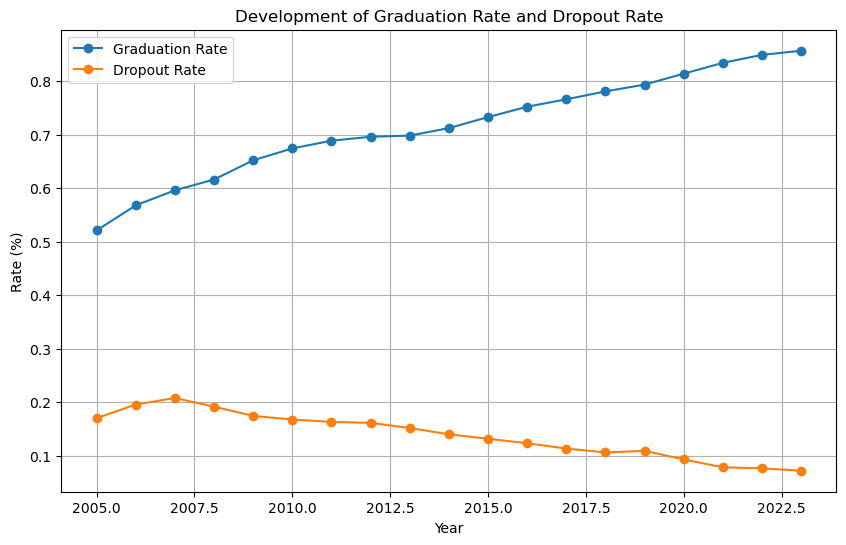

In [151]:

# Assuming df is your DataFrame with graduation_year, graduation_rate, and drop_out_rate columns

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot graduation_rate
plt.plot(full_graduates_total['graduation_year'], full_graduates_total['graduation_rate'], marker='o', label='Graduation Rate')

# Plot drop_out_rate
plt.plot(full_graduates_total['graduation_year'], full_graduates_total['dropout_rate'], marker='o', label='Dropout Rate')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Rate (%)')
plt.title('Development of Graduation Rate and Dropout Rate')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


## Lets plot some totals

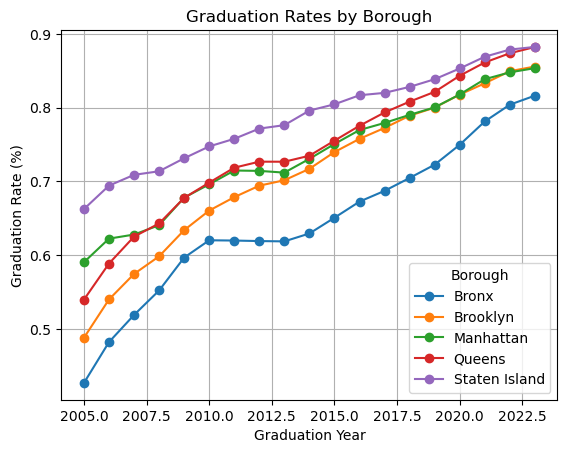

In [68]:
# Pivot the data to have boroughs as columns
pivot_df = full_graduates_ethnicity_total.pivot(index='graduation_year', columns='borough', values='graduation_rate')

# Plot the data
pivot_df.plot(kind='line', marker='o')

# Add labels and title
plt.xlabel('Graduation Year')
plt.ylabel('Graduation Rate (%)')
plt.title('Graduation Rates by Borough')

# Show the plot
plt.legend(title='Borough')
plt.grid(True)
plt.show()

### Main takeaways:
- upward trend
- peak in 2010 and a bit down in 2012 
- Staten Island always leading
- Bronx always at the bottom 
- Queens & manhattan more or less together 
- Brooklyn takes over Manhattan

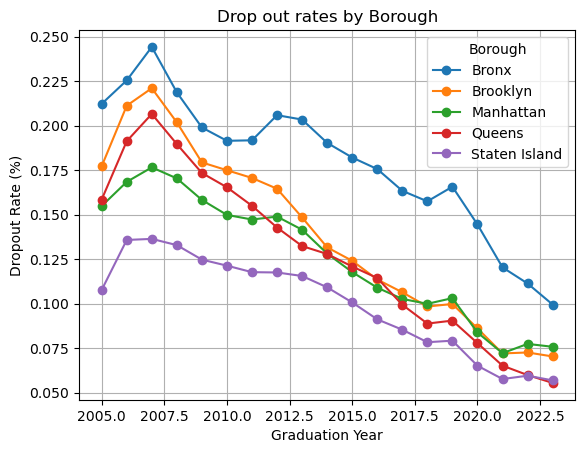

In [69]:
# Pivot the data to have boroughs as columns
pivot_df = full_graduates_ethnicity_total.pivot(index='graduation_year', columns='borough', values='dropout_rate')

# Plot the data
pivot_df.plot(kind='line', marker='o')

# Add labels and title
plt.xlabel('Graduation Year')
plt.ylabel('Dropout Rate (%)')
plt.title('Drop out rates by Borough')

# Show the plot
plt.legend(title='Borough')
plt.grid(True)
plt.show()

### Main takeaways:
- downward trend
- peak in 2006 and upward in 2011-12, 2019 (prob covid) 
- Bronx always leading
- Staten Island always at the bottom 


## Lets plot by ethnicity

In [81]:
graduation_rates_ethnicity

,graduation_year,borough,category,#_total_cohort,#_grads,#_still_enrolled,#_dropout,graduation_rate,dropout_rate
0,2005,Bronx,Asian,638,479.0,92.0,60.0,0.750784,0.094044
1,2005,Bronx,Black,3852,1662.0,1213.0,770.0,0.431464,0.199896
4,2005,Bronx,Hispanic,6150,2261.0,2035.0,1506.0,0.367642,0.244878
6,2005,Bronx,Multi-Racial,1,0.0,0.0,0.0,0.000000,0.000000
7,2005,Bronx,Native American,56,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
941,2023,Staten Island,Black,1835,1445.0,100.0,222.0,0.787466,0.120981
944,2023,Staten Island,Hispanic,3779,3069.0,212.0,354.0,0.812120,0.093676
946,2023,Staten Island,Multi-Racial,183,160.0,10.0,9.0,0.874317,0.049180
947,2023,Staten Island,Native American,72,62.0,3.0,4.0,0.861111,0.055556


### Graduation rates

In [155]:
graduation_rates_ethnicity_total = graduation_rates_ethnicity.groupby(['graduation_year','category']).agg({'#_total_cohort':'sum',
                                                                                                           '#_grads':'sum',
                                                                                                           '#_dropout':'sum'}).reset_index()
graduation_rates_ethnicity_total

,graduation_year,category,#_total_cohort,#_grads,#_dropout
0,2005,Asian,9192,6391.0,928.0
1,2005,Black,22132,10257.0,3849.0
2,2005,Hispanic,22221,9487.0,4823.0
3,2005,Multi-Racial,2,0.0,0.0
4,2005,Native American,206,48.0,18.0
...,...,...,...,...,...
109,2023,Black,51218,42535.0,3871.0
110,2023,Hispanic,86138,70654.0,8608.0
111,2023,Multi-Racial,3246,2954.0,116.0
112,2023,Native American,2487,2108.0,178.0


In [156]:
graduation_rates_ethnicity_total['graduation_rate'] = graduation_rates_ethnicity_total['#_grads']/graduation_rates_ethnicity_total['#_total_cohort']
graduation_rates_ethnicity_total['dropout_rate'] = graduation_rates_ethnicity_total['#_dropout']/graduation_rates_ethnicity_total['#_total_cohort']
graduation_rates_ethnicity_total

,graduation_year,category,#_total_cohort,#_grads,#_dropout,graduation_rate,dropout_rate
0,2005,Asian,9192,6391.0,928.0,0.695279,0.100957
1,2005,Black,22132,10257.0,3849.0,0.463447,0.173911
2,2005,Hispanic,22221,9487.0,4823.0,0.426938,0.217047
3,2005,Multi-Racial,2,0.0,0.0,0.000000,0.000000
4,2005,Native American,206,48.0,18.0,0.233010,0.087379
...,...,...,...,...,...,...,...
109,2023,Black,51218,42535.0,3871.0,0.830470,0.075579
110,2023,Hispanic,86138,70654.0,8608.0,0.820242,0.099933
111,2023,Multi-Racial,3246,2954.0,116.0,0.910043,0.035736
112,2023,Native American,2487,2108.0,178.0,0.847608,0.071572


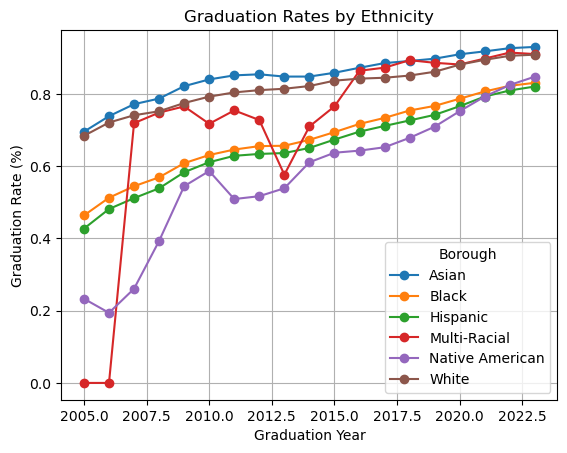

In [159]:
# Pivot the data to have boroughs as columns
pivot_df = graduation_rates_ethnicity_total.pivot(index='graduation_year', columns='category', values='graduation_rate')

# Plot the data
pivot_df.plot(kind='line', marker='o')

# Add labels and title
plt.xlabel('Graduation Year')
plt.ylabel('Graduation Rate (%)')
plt.title('Graduation Rates by Ethnicity')

# Show the plot
plt.legend(title='Borough')
plt.grid(True)
plt.show()

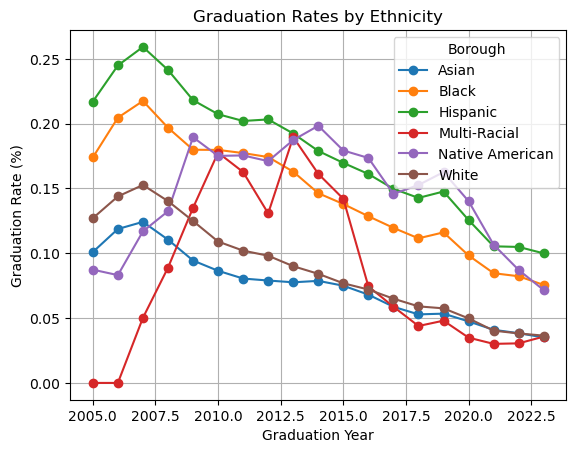

In [160]:
# Pivot the data to have boroughs as columns
pivot_df = graduation_rates_ethnicity_total.pivot(index='graduation_year', columns='category', values='dropout_rate')

# Plot the data
pivot_df.plot(kind='line', marker='o')

# Add labels and title
plt.xlabel('Graduation Year')
plt.ylabel('Graduation Rate (%)')
plt.title('Graduation Rates by Ethnicity')

# Show the plot
plt.legend(title='Borough')
plt.grid(True)
plt.show()

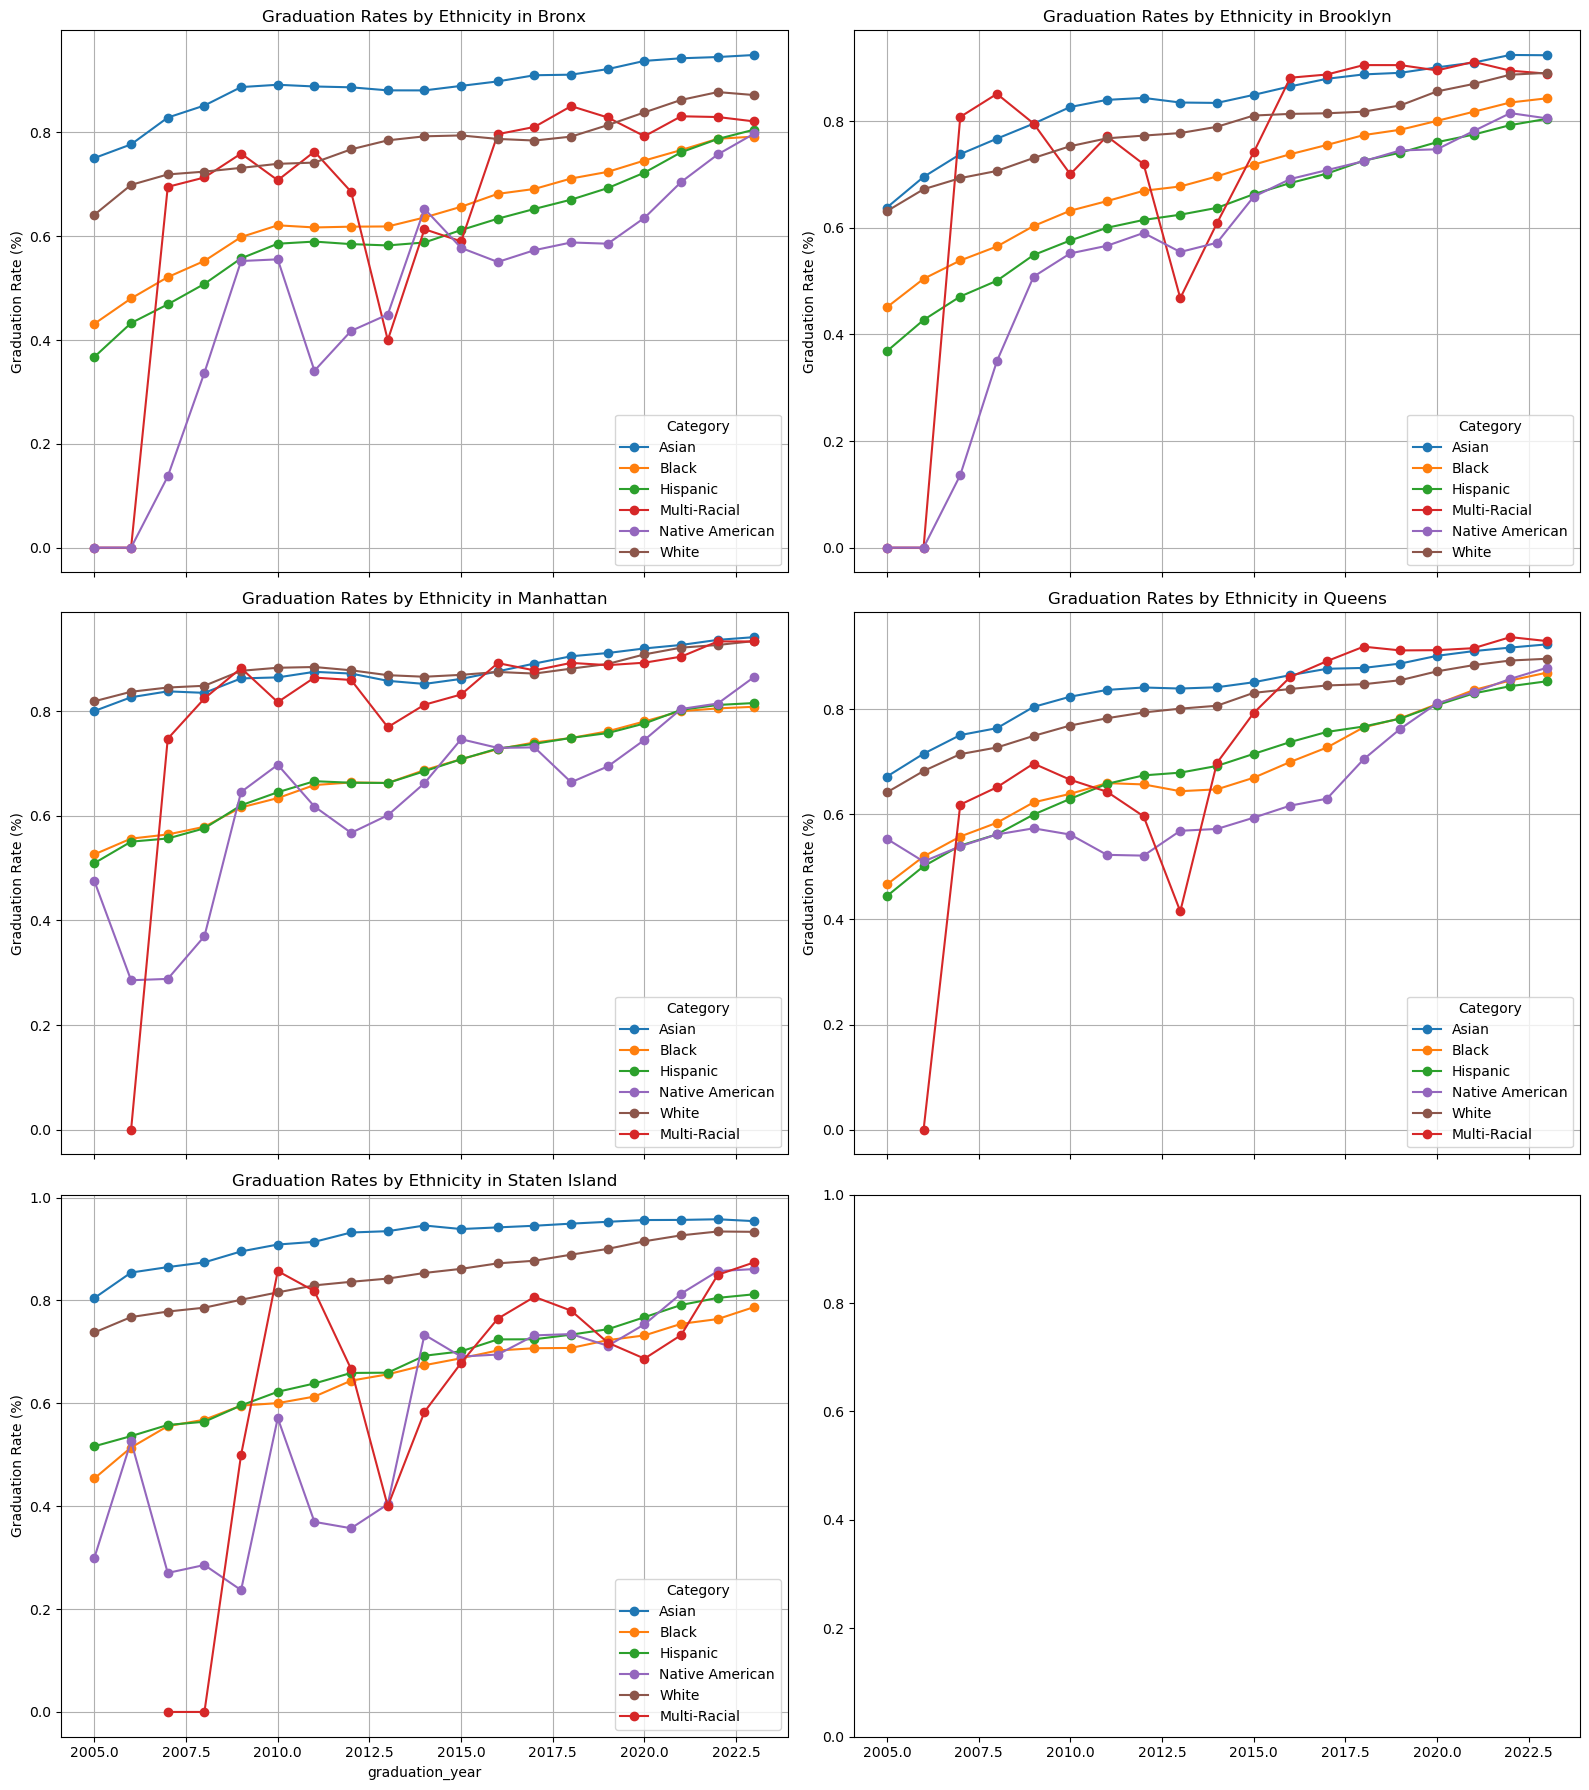

In [134]:

# Define color palette
colors = sns.color_palette('tab10')

# Get unique boroughs
boroughs = graduation_rates_ethnicity['borough'].unique()

# Calculate number of rows and columns for subplots
n_rows = (len(boroughs) + 1) // 2  # Number of rows
n_cols = 2  # Number of columns

# Define a dictionary to map categories to colors
category_colors = {category: colors[i % len(colors)] for i, category in enumerate(graduation_rates_ethnicity['category'].unique())}

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, 6 * n_rows), sharex=True)

# Plot each borough
for i, borough in enumerate(boroughs):
    row = i // n_cols
    col = i % n_cols
    borough_data = graduation_rates_ethnicity[graduation_rates_ethnicity['borough'] == borough]
    categories = borough_data['category'].unique()
    for category in categories:
        category_data = borough_data[borough_data['category'] == category]
        axs[row, col].plot(category_data['graduation_year'], category_data['graduation_rate'], label=category, marker='o', color=category_colors[category])

    # Add labels and title for each subplot
    axs[row, col].set_title(f'Graduation Rates by Ethnicity in {borough}')
    axs[row, col].set_ylabel('Graduation Rate (%)')
    axs[row, col].legend(title='Category')
    axs[row, col].grid(True)

# Add common x-axis label
axs[-1, 0].set_xlabel('graduation_year')
axs[-1, 1].set_xlabel('graduation_year') if len(boroughs) % 2 == 0 else None  # Only set xlabel for the last subplot in the last row if even number of boroughs

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


## Dropout rates

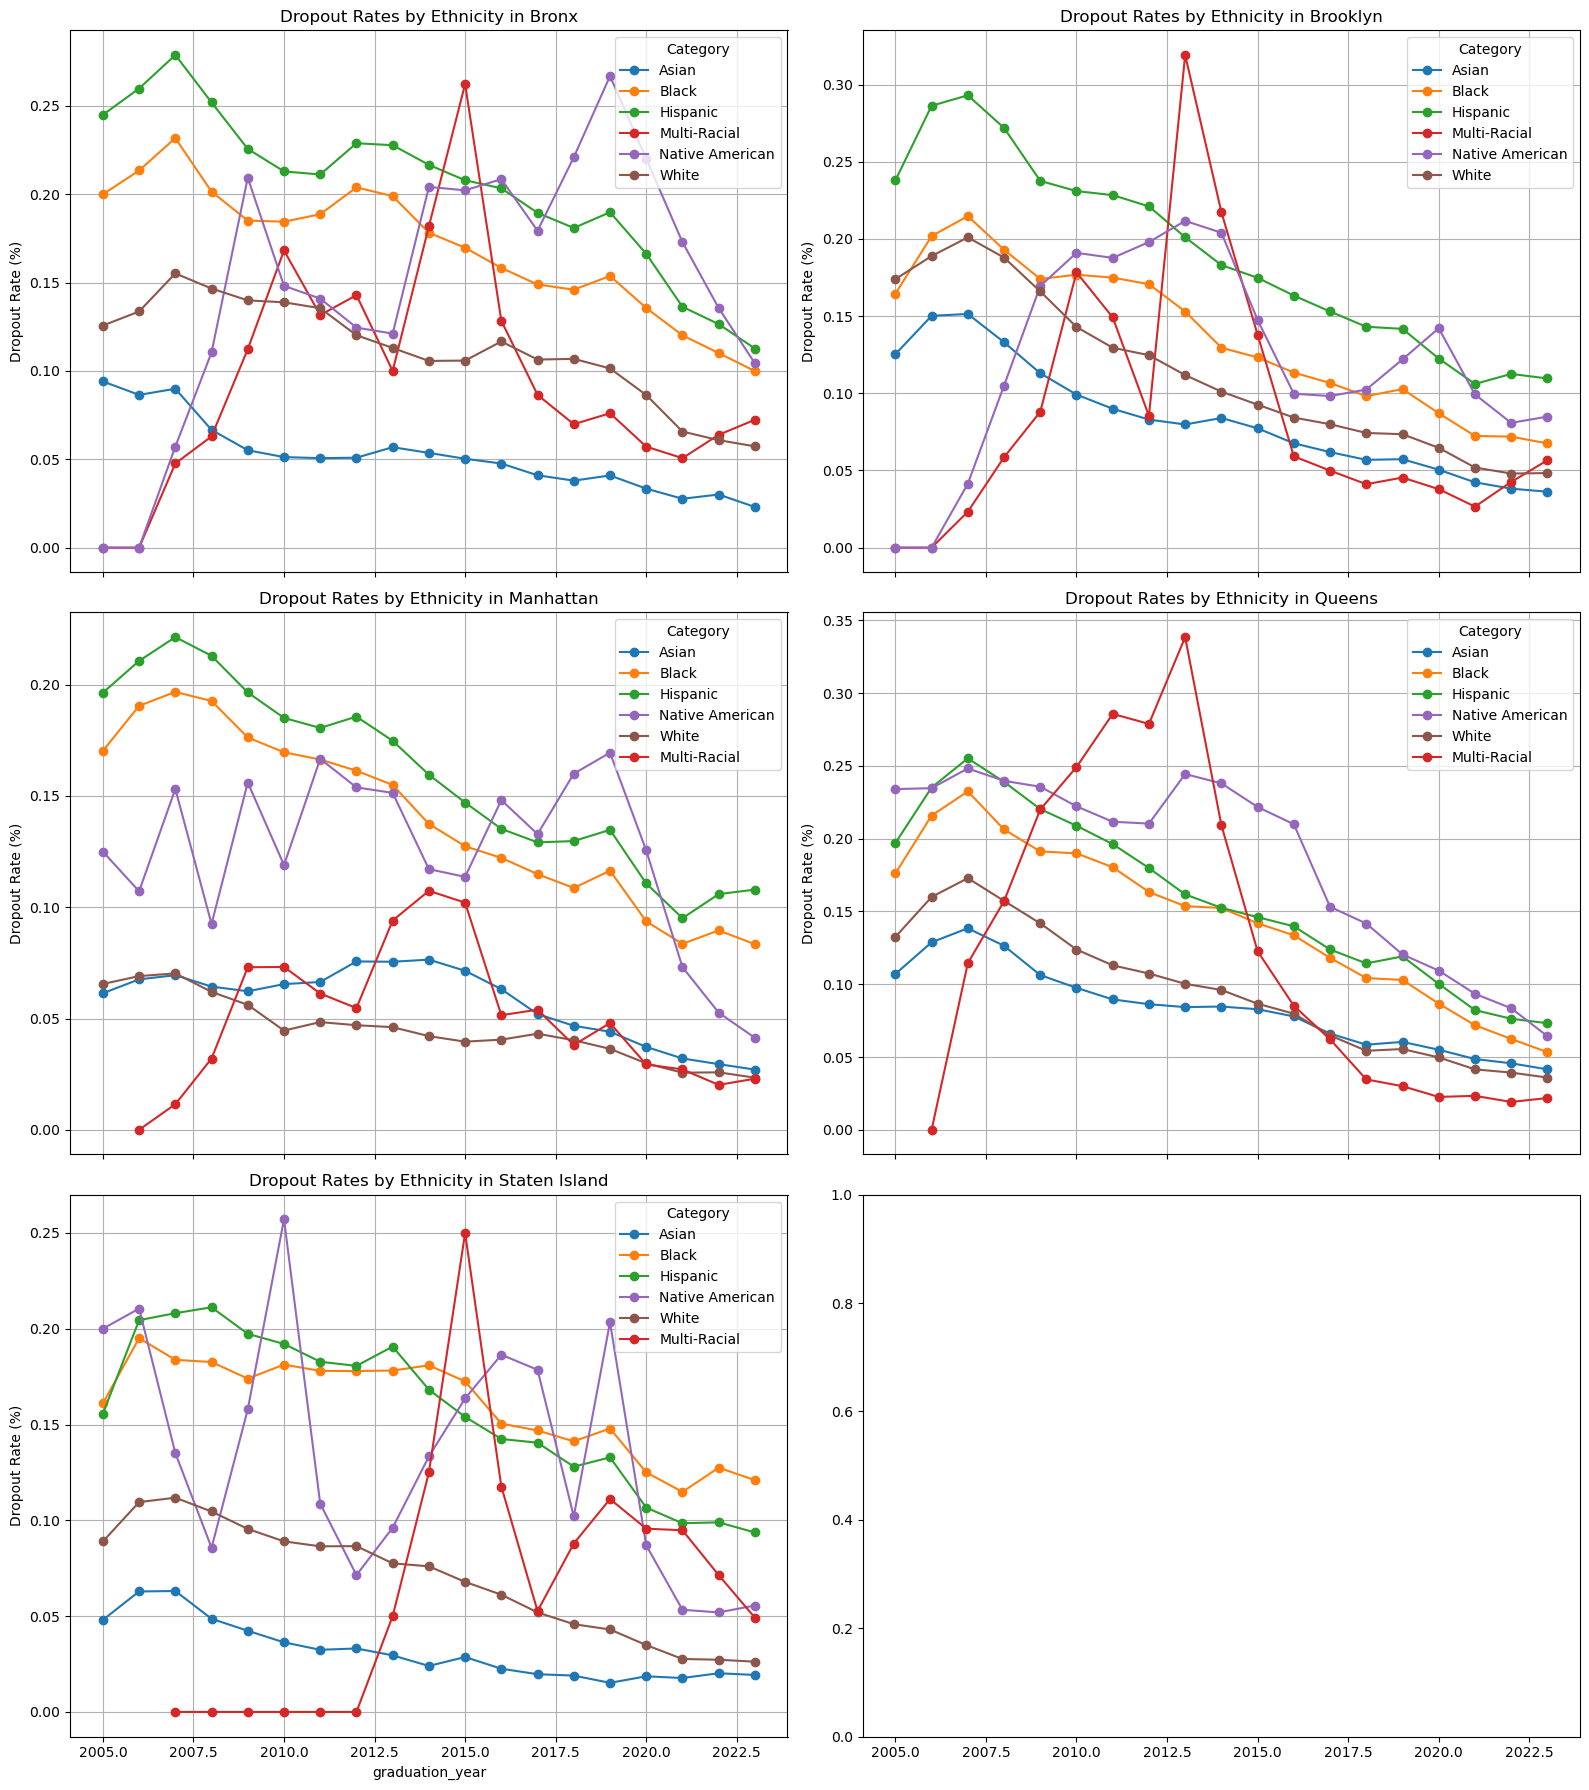

In [135]:
# Define color palette
colors = sns.color_palette('tab10')

# Get unique boroughs
boroughs = graduation_rates_ethnicity['borough'].unique()

# Calculate number of rows and columns for subplots
n_rows = (len(boroughs) + 1) // 2  # Number of rows
n_cols = 2  # Number of columns

# Define a dictionary to map categories to colors
category_colors = {category: colors[i % len(colors)] for i, category in enumerate(graduation_rates_ethnicity['category'].unique())}

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, 6 * n_rows), sharex=True)

# Plot each borough
for i, borough in enumerate(boroughs):
    row = i // n_cols
    col = i % n_cols
    borough_data = graduation_rates_ethnicity[graduation_rates_ethnicity['borough'] == borough]
    categories = borough_data['category'].unique()
    for category in categories:
        category_data = borough_data[borough_data['category'] == category]
        axs[row, col].plot(category_data['graduation_year'], category_data['dropout_rate'], label=category, marker='o', color=category_colors[category])

    # Add labels and title for each subplot
    axs[row, col].set_title(f'Dropout Rates by Ethnicity in {borough}')
    axs[row, col].set_ylabel('Dropout Rate (%)')
    axs[row, col].legend(title='Category')
    axs[row, col].grid(True)

# Add common x-axis label
axs[-1, 0].set_xlabel('graduation_year')
axs[-1, 1].set_xlabel('graduation_year') if len(boroughs) % 2 == 0 else None  # Only set xlabel for the last subplot in the last row if even number of boroughs

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Lets plot poverty

One of the categories/layers is economic situation:
- Econ Disadv: "poverty"
- Not Econ Disadv: "non poverty"

In [103]:
graduation_rates['category'].value_counts()

category
Asian                      95
Black                      95
Econ Disadv                95
Female                     95
Hispanic                   95
Male                       95
Native American            95
Not Econ Disadv            95
White                      95
Multi-Racial               91
Neither Female nor Male     5
Name: count, dtype: int64

In [104]:
# first we will need to filter for the categories including th economic situation filter
graduation_rates_econ_situation= graduation_rates[graduation_rates.category.isin(filter_econ_situation)]
graduation_rates_econ_situation.head()

,graduation_year,borough,category,#_total_cohort,#_grads,#_still_enrolled,#_dropout
2,2005,Bronx,Econ Disadv,8217,3831.0,2244.0,1696.0
8,2005,Bronx,Not Econ Disadv,3236,1082.0,1268.0,742.0
12,2005,Brooklyn,Econ Disadv,10659,5322.0,3228.0,1761.0
18,2005,Brooklyn,Not Econ Disadv,9302,4436.0,2873.0,1786.0
22,2005,Manhattan,Econ Disadv,8935,5350.0,1963.0,1310.0


Lets plot graduation_rates based on economic situation as a whole 

In [121]:
graduation_rates_econ_situation_total = graduation_rates_econ_situation.groupby(['graduation_year','category']).agg({'#_total_cohort':'sum',
                                                                                                                     '#_grads':'sum',
                                                                                                                     '#_still_enrolled':'sum',
                                                                                                                     '#_dropout':'sum'}).reset_index()
graduation_rates_econ_situation_total.head()

,graduation_year,category,#_total_cohort,#_grads,#_still_enrolled,#_dropout
0,2005,Econ Disadv,35801,18951.0,9493.0,5939.0
1,2005,Not Econ Disadv,29166,14945.0,8414.0,5121.0
2,2006,Econ Disadv,74040,41717.0,14597.0,14312.0
3,2006,Not Econ Disadv,59626,34323.0,11422.0,11890.0
4,2007,Econ Disadv,116490,70962.0,15544.0,24670.0


In [122]:
#lets calculate graduation and dropout rates
graduation_rates_econ_situation_total['graduation_rate'] = graduation_rates_econ_situation_total['#_grads']/graduation_rates_econ_situation_total['#_total_cohort']
graduation_rates_econ_situation_total['dropout_rate'] = graduation_rates_econ_situation_total['#_dropout']/graduation_rates_econ_situation_total['#_total_cohort']
graduation_rates_econ_situation_total


,graduation_year,category,#_total_cohort,#_grads,#_still_enrolled,#_dropout,graduation_rate,dropout_rate
0,2005,Econ Disadv,35801,18951.0,9493.0,5939.0,0.529343,0.165889
1,2005,Not Econ Disadv,29166,14945.0,8414.0,5121.0,0.512412,0.175581
2,2006,Econ Disadv,74040,41717.0,14597.0,14312.0,0.563439,0.193301
3,2006,Not Econ Disadv,59626,34323.0,11422.0,11890.0,0.575638,0.199410
4,2007,Econ Disadv,116490,70962.0,15544.0,24670.0,0.609168,0.211778
5,2007,Not Econ Disadv,88654,51473.0,16220.0,18029.0,0.580606,0.203364
6,2008,Econ Disadv,124812,76291.0,19767.0,23626.0,0.611247,0.189293
7,2008,Not Econ Disadv,90076,56245.0,13170.0,17603.0,0.624417,0.195424
8,2009,Econ Disadv,133855,88575.0,17578.0,21136.0,0.661724,0.157902
9,2009,Not Econ Disadv,90446,57734.0,9803.0,17951.0,0.638326,0.198472


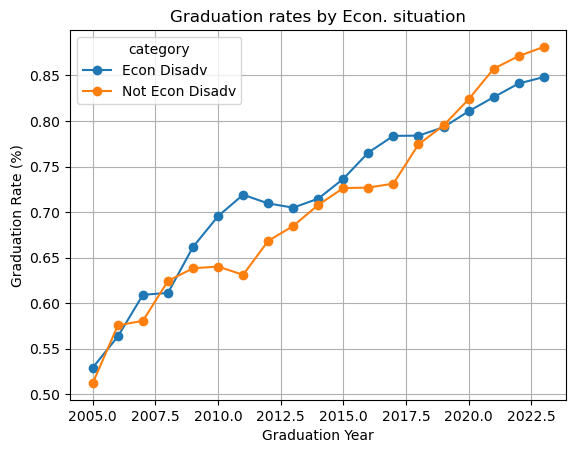

In [142]:
# Pivot the data to have boroughs as columns
pivot_df = graduation_rates_econ_situation_total.pivot(index='graduation_year', columns='category', values='graduation_rate')

# Plot the data
pivot_df.plot(kind='line', marker='o')

# Add labels and title
plt.xlabel('Graduation Year')
plt.ylabel('Graduation Rate (%)')
plt.title('Graduation rates by Econ. situation')

# Show the plot
plt.grid(True)
plt.show()

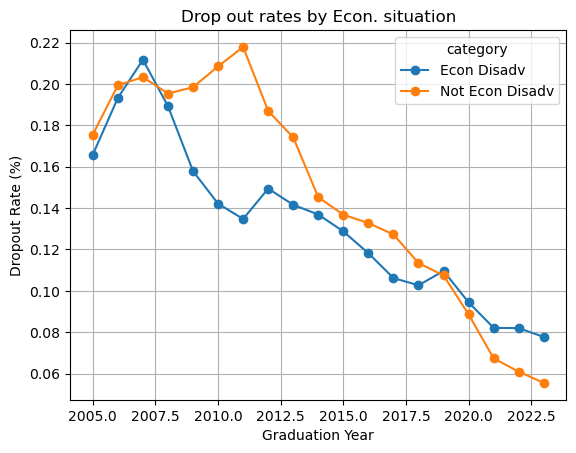

In [132]:
# Pivot the data to have boroughs as columns
pivot_df = graduation_rates_econ_situation_total.pivot(index='graduation_year', columns='category', values='dropout_rate')

# Plot the data
pivot_df.plot(kind='line', marker='o')

# Add labels and title
plt.xlabel('Graduation Year')
plt.ylabel('Dropout Rate (%)')
plt.title('Drop out rates by Econ. situation')

# Show the plot
plt.grid(True)
plt.show()

Lets plot students per borough

In [113]:
full_graduates_ethnicity_total.head()

,graduation_year,borough,#_total_cohort,#_grads,graduation_rate,#_dropout,dropout_rate
0,2005,Bronx,11453,4887.0,0.426700,2431.0,0.212259
1,2005,Brooklyn,19961,9739.0,0.487901,3537.0,0.177196
2,2005,Manhattan,12670,7480.0,0.590371,1962.0,0.154854
3,2005,Queens,17011,9180.0,0.539651,2696.0,0.158486
4,2005,Staten Island,3872,2565.0,0.662448,417.0,0.107696


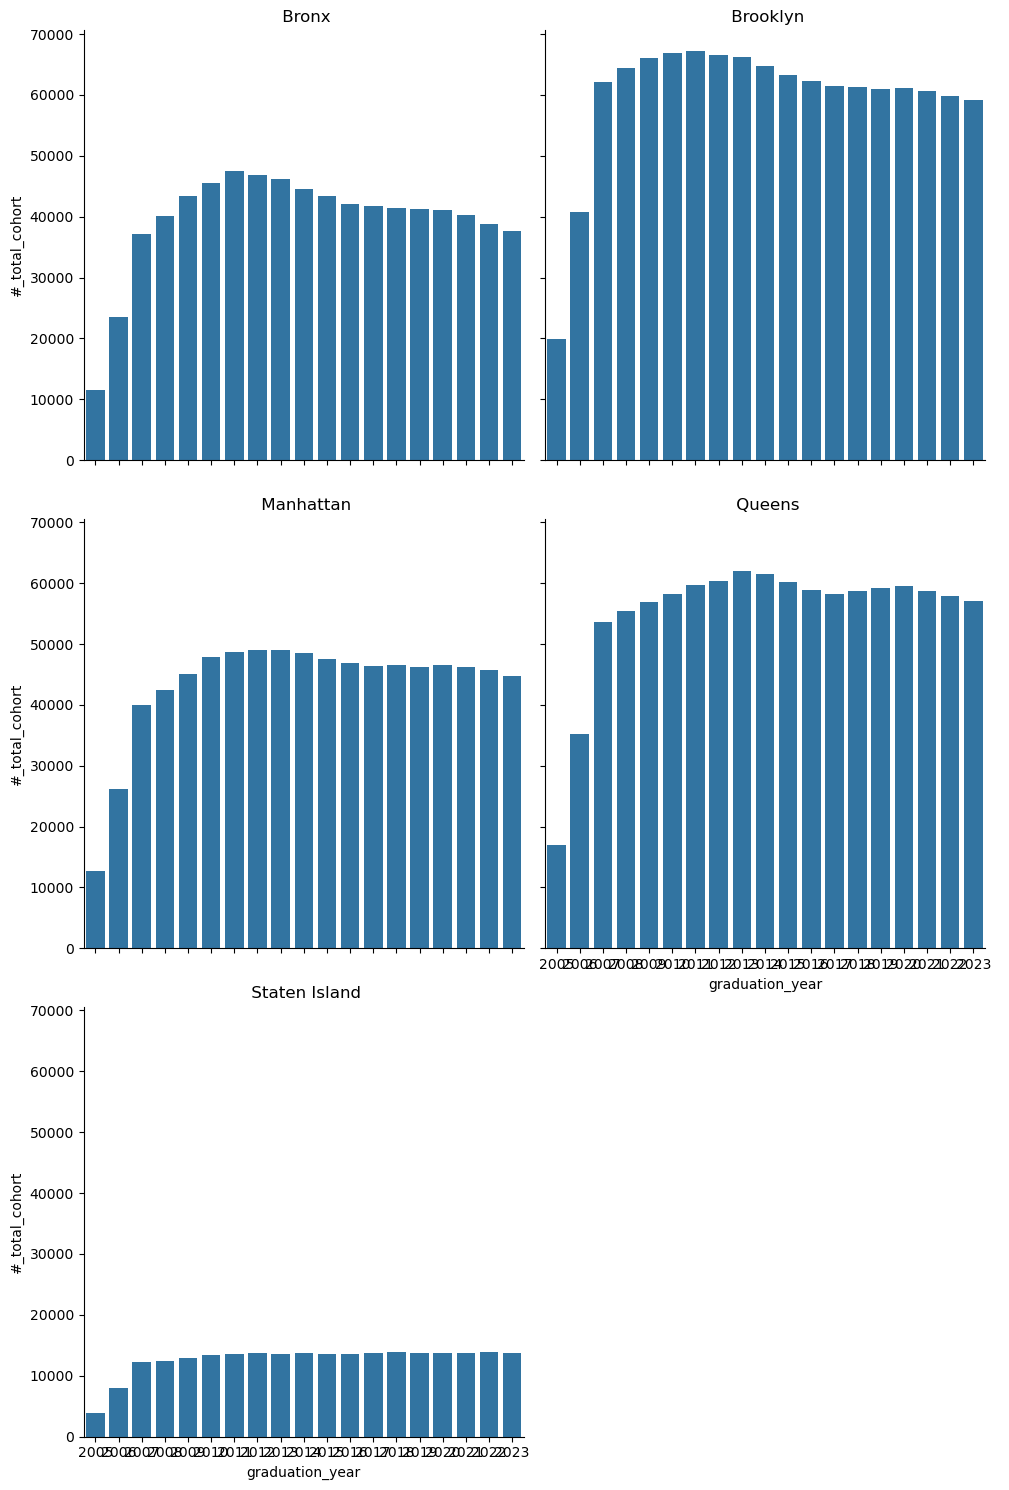

In [116]:

# Create a FacetGrid with borough as the row variable and economic situation as the column variable
g = sns.catplot(x='graduation_year', y='#_total_cohort', 
                col='borough', col_wrap=2, kind='bar', data=full_graduates_ethnicity_total)

# Set the title for each subplot
for ax in g.axes.flat:
    ax.set_title(ax.get_title().split('=')[1])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Lets plot the economic situation from each Borough

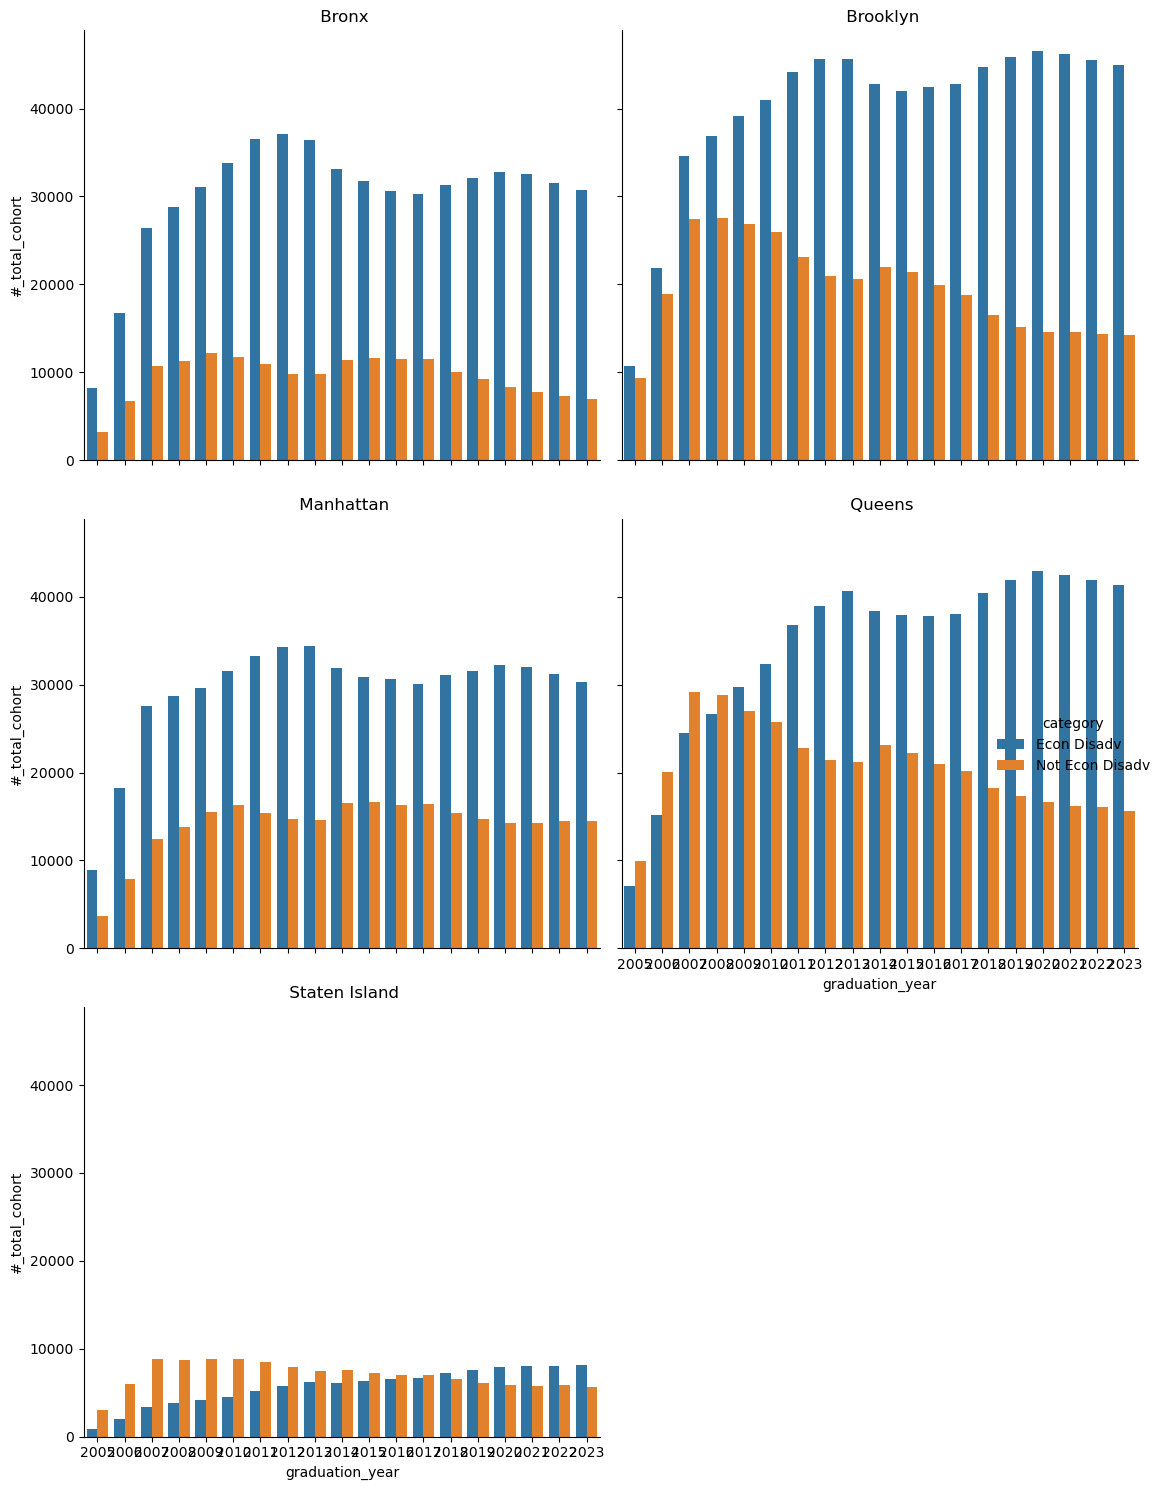

In [138]:

# Assuming your DataFrame is called df

# Create a FacetGrid with borough as the row variable and economic situation as the column variable
g = sns.catplot(x='graduation_year', y='#_total_cohort', hue='category',
                col='borough', col_wrap=2, kind='bar', data=graduation_rates_econ_situation)

# Set the title for each subplot
for ax in g.axes.flat:
    ax.set_title(ax.get_title().split('=')[1])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


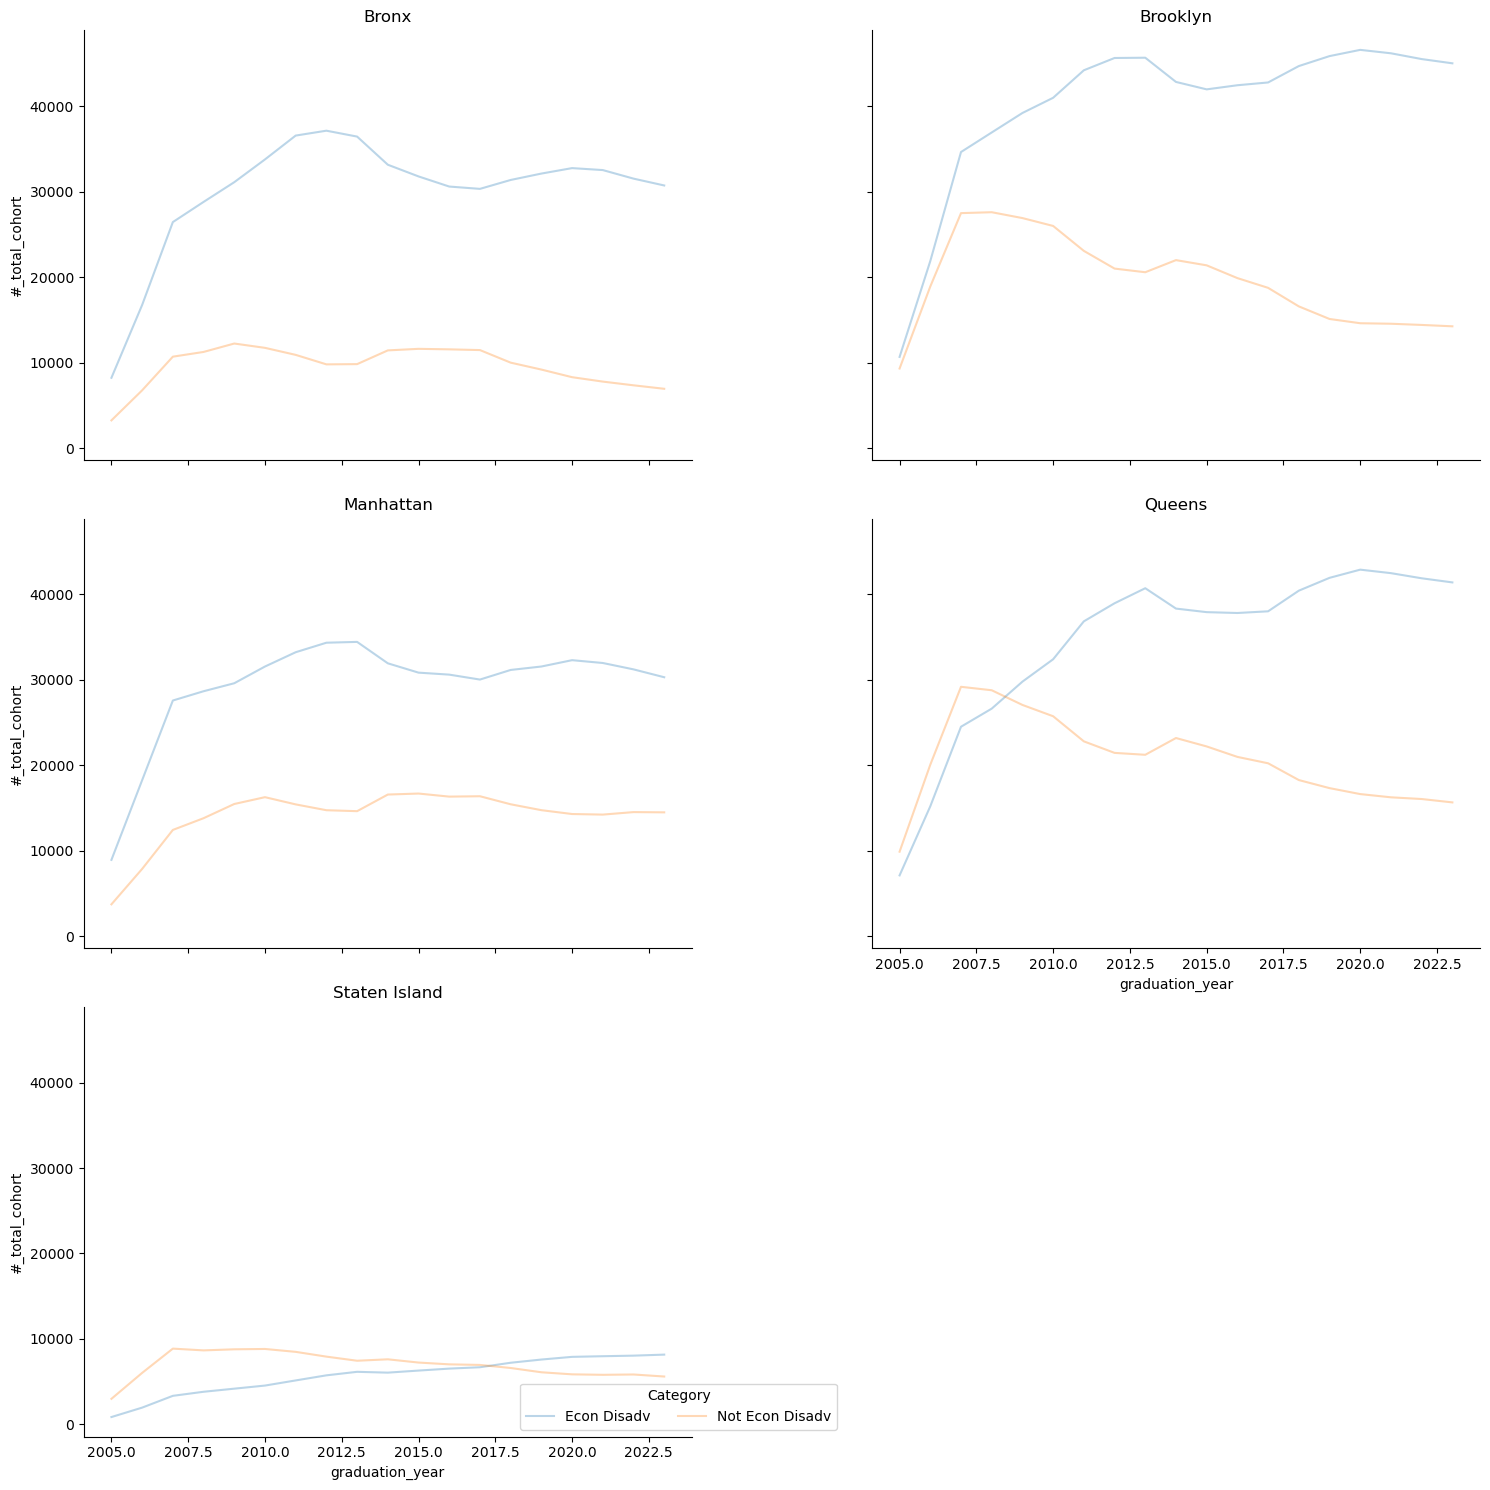

In [141]:
# Create a FacetGrid with borough as the row variable and economic situation as the column variable
g = sns.FacetGrid(graduation_rates_econ_situation, col='borough', col_wrap=2, height=5, aspect=1.5)

# Map lineplot with area filling onto each subplot
g.map_dataframe(sns.lineplot, x='graduation_year', y='#_total_cohort', hue='category', estimator=None, alpha=0.3)

# Set the title for each subplot
for ax, title in zip(g.axes.flat, graduation_rates_econ_situation['borough'].unique()):
    ax.set_title(title)

# Add legend to the last subplot
g.axes[-1].legend(title='Category', loc='lower right', bbox_to_anchor=(1.25, 0), ncol=3)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



Lets add the graduation and dropout rates to the ecnomic situation dataframe

In [107]:
graduation_rates_econ_situation['graduation_rate'] = graduation_rates_econ_situation['#_grads']/graduation_rates_econ_situation['#_total_cohort']
graduation_rates_econ_situation['dropout_rate'] = graduation_rates_econ_situation['#_dropout']/graduation_rates_econ_situation['#_total_cohort']
graduation_rates_econ_situation

/var/folders/m3/_16y3dv54zv5tjsslshf6n3w0000gn/T/ipykernel_69019/2367007354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graduation_rates_econ_situation['graduation_rate'] = graduation_rates_econ_situation['#_grads']/graduation_rates_econ_situation['#_total_cohort']
/var/folders/m3/_16y3dv54zv5tjsslshf6n3w0000gn/T/ipykernel_69019/2367007354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graduation_rates_econ_situation['dropout_rate'] = graduation_rates_econ_situation['#_dropout']/graduation_rate

,graduation_year,borough,category,#_total_cohort,#_grads,#_still_enrolled,#_dropout,graduation_rate,dropout_rate
2,2005,Bronx,Econ Disadv,8217,3831.0,2244.0,1696.0,0.466229,0.206401
8,2005,Bronx,Not Econ Disadv,3236,1082.0,1268.0,742.0,0.334363,0.229295
12,2005,Brooklyn,Econ Disadv,10659,5322.0,3228.0,1761.0,0.499296,0.165212
18,2005,Brooklyn,Not Econ Disadv,9302,4436.0,2873.0,1786.0,0.476887,0.192002
22,2005,Manhattan,Econ Disadv,8935,5350.0,1963.0,1310.0,0.598769,0.146614
...,...,...,...,...,...,...,...,...,...
927,2023,Manhattan,Not Econ Disadv,14495,12886.0,719.0,789.0,0.888996,0.054433
931,2023,Queens,Econ Disadv,41390,36638.0,1686.0,2179.0,0.885190,0.052646
938,2023,Queens,Not Econ Disadv,15658,13687.0,762.0,984.0,0.874122,0.062843
942,2023,Staten Island,Econ Disadv,8172,6879.0,394.0,611.0,0.841777,0.074767


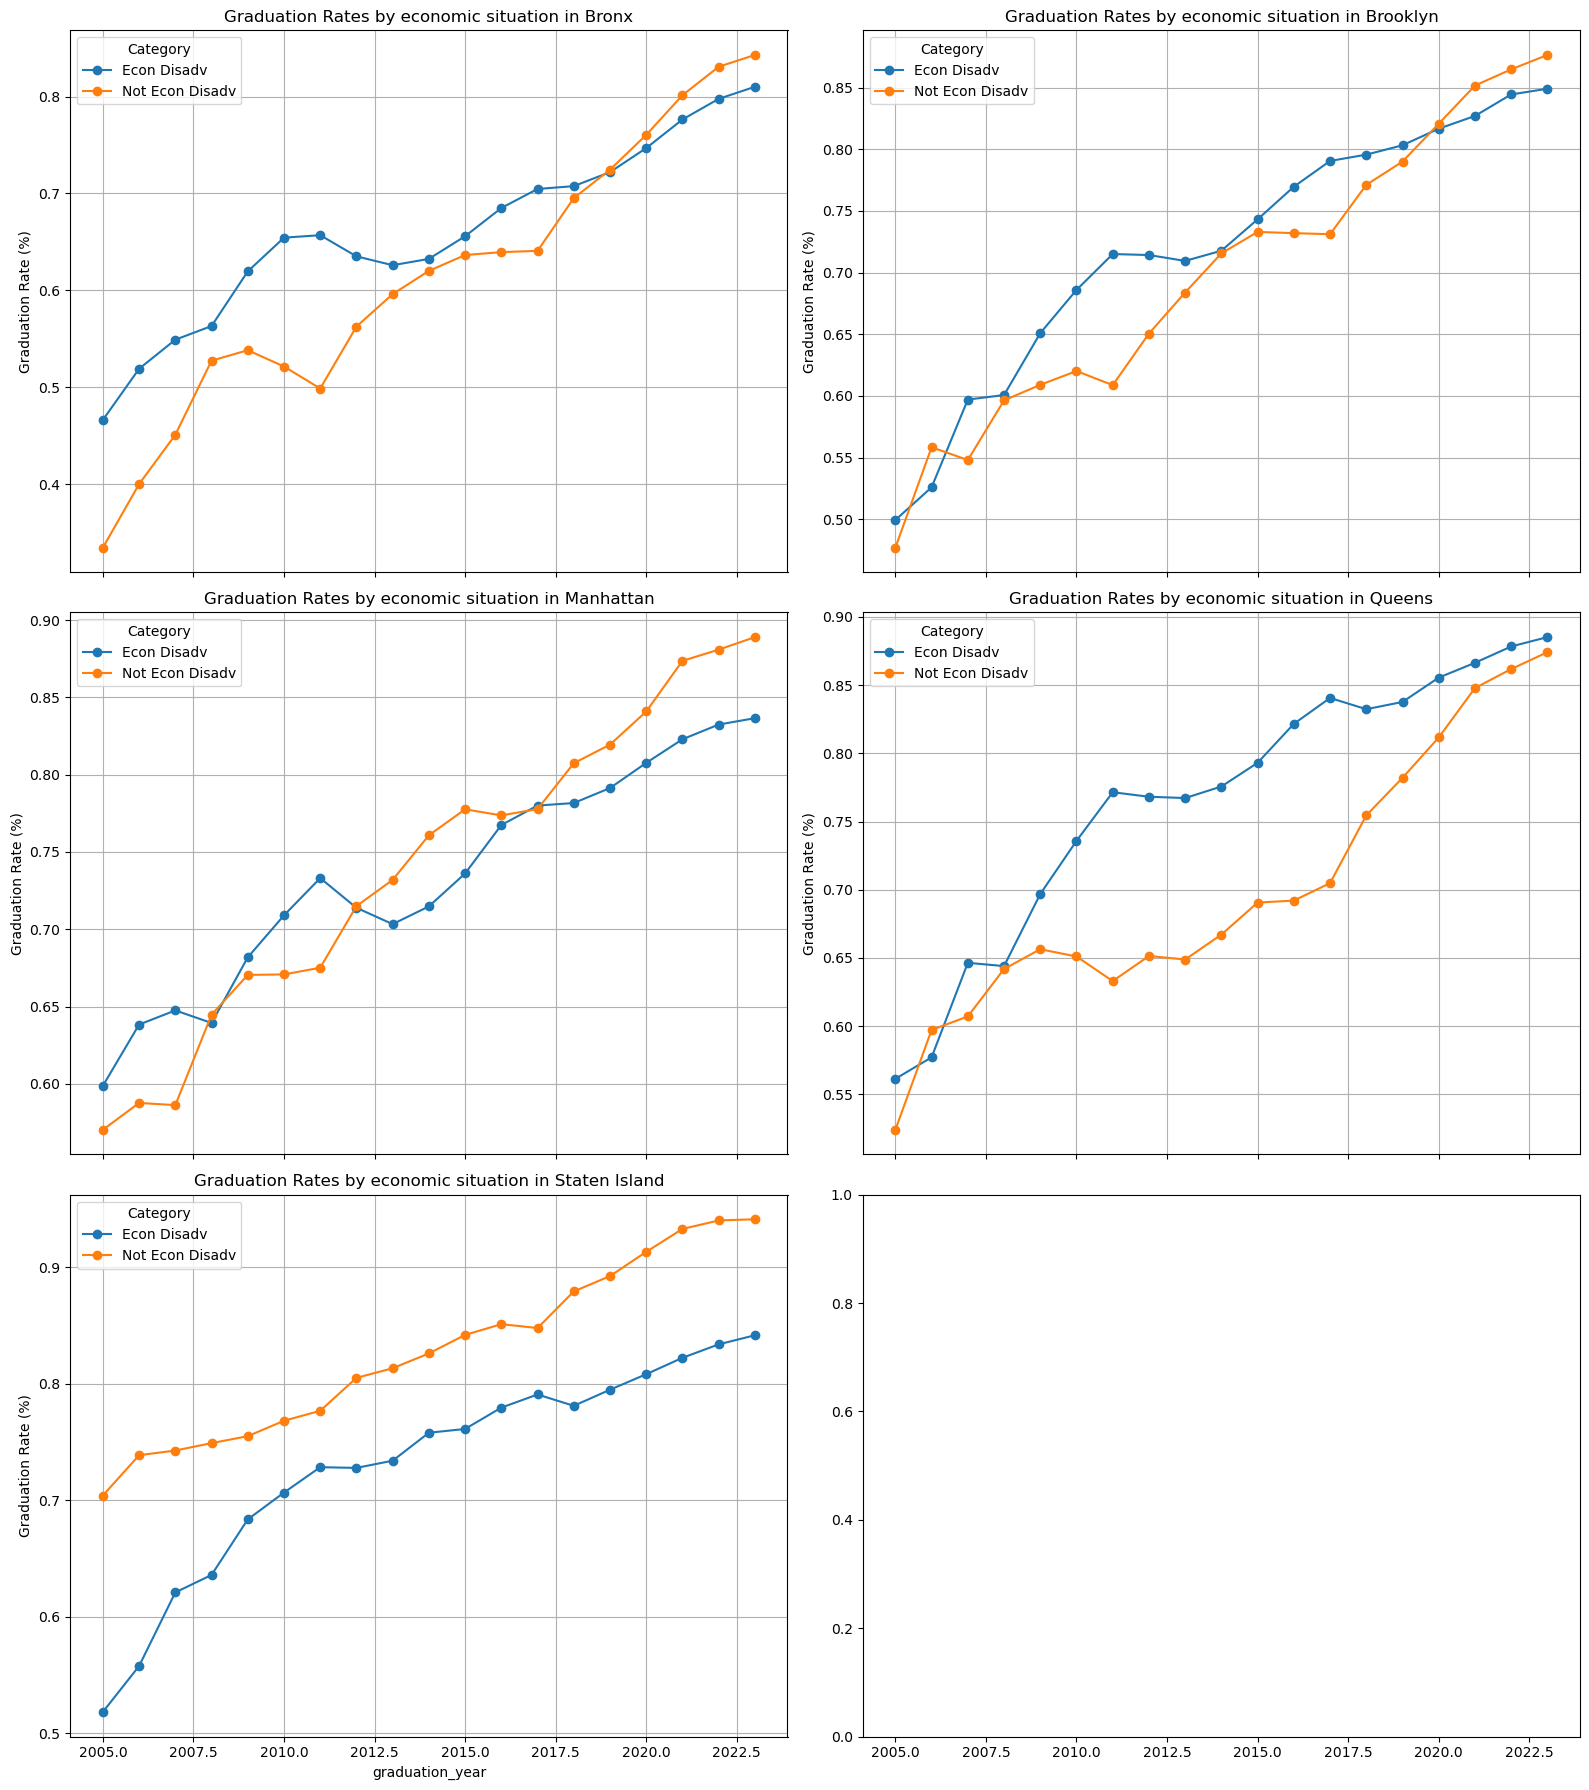

In [144]:
# Get unique boroughs
boroughs = graduation_rates_econ_situation['borough'].unique()

# Calculate number of rows and columns for subplots
n_rows = (len(boroughs) + 1) // 2  # Number of rows
n_cols = 2  # Number of columns

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, 6 * n_rows), sharex=True)

# Plot each borough
for i, borough in enumerate(boroughs):
    row = i // n_cols
    col = i % n_cols
    borough_data = graduation_rates_econ_situation[graduation_rates_econ_situation['borough'] == borough]
    categories = borough_data['category'].unique()
    for category in categories:
        category_data = borough_data[borough_data['category'] == category]
        axs[row, col].plot(category_data['graduation_year'], category_data['graduation_rate'], label=category, marker='o')

    # Add labels and title for each subplot
    axs[row, col].set_title(f'Graduation Rates by economic situation in {borough}')
    axs[row, col].set_ylabel('Graduation Rate (%)')
    axs[row, col].legend(title='Category')
    axs[row, col].grid(True)

# Add common x-axis label
axs[-1, 0].set_xlabel('graduation_year')
axs[-1, 1].set_xlabel('graduation_year') if len(boroughs) % 2 == 0 else None  # Only set xlabel for the last subplot in the last row if even number of boroughs

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Now that we are happy with the education data lets understand the crime data

In [163]:
# for that lets bring to VSCode the crime_yearly dataframe 
borough_total_yearly_crimes_population = get_dataframe(f'select * from capstone_crime_nerds.borough_total_yearly_crimes_population')
borough_total_yearly_crimes_population

,year,borough,n_crimes,population
0,2010.0,Bronx,111668,1365725
1,2010.0,Brooklyn,151651,2466782
2,2010.0,Manhattan,121425,1583345
3,2010.0,Queens,98643,2199169
4,2010.0,Staten Island,24126,463450
...,...,...,...,...
60,2022.0,Bronx,112248,1443229
61,2022.0,Brooklyn,147532,2679620
62,2022.0,Manhattan,133383,1645867
63,2022.0,Queens,115043,2360826


In [164]:
borough_total_yearly_crimes_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        65 non-null     float64
 1   borough     65 non-null     object 
 2   n_crimes    65 non-null     int64  
 3   population  65 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 2.2+ KB


## Lets calculate the crime ratio per year per borough

In [168]:
# for that we create a new column name crime ratio which is (n_crimes)/population *100000

borough_total_yearly_crimes_population ['crime_ratio'] = (borough_total_yearly_crimes_population['n_crimes']/borough_total_yearly_crimes_population['population'])*100000
borough_total_yearly_crimes_population

,year,borough,n_crimes,population,crime_ratio
0,2010.0,Bronx,111668,1365725,8176.463051
1,2010.0,Brooklyn,151651,2466782,6147.726066
2,2010.0,Manhattan,121425,1583345,7668.890861
3,2010.0,Queens,98643,2199169,4485.467010
4,2010.0,Staten Island,24126,463450,5205.739562
...,...,...,...,...,...
60,2022.0,Bronx,112248,1443229,7777.559902
61,2022.0,Brooklyn,147532,2679620,5505.706033
62,2022.0,Manhattan,133383,1645867,8104.117769
63,2022.0,Queens,115043,2360826,4872.997841


In [173]:
full_graduates_ethnicity_total[full_graduates_ethnicity_total['graduation_year']==2010]

,graduation_year,borough,#_total_cohort,#_grads,graduation_rate,#_dropout,dropout_rate
25,2010,Bronx,45478,28202.0,0.620124,8708.0,0.191477
26,2010,Brooklyn,66947,44212.0,0.660403,11712.0,0.174944
27,2010,Manhattan,47820,33283.0,0.696006,7165.0,0.149833
28,2010,Queens,58136,40596.0,0.698294,9613.0,0.165354
29,2010,Staten Island,13385,10004.0,0.747404,1624.0,0.121330


In [171]:
# in order to compare the graduation_rate per year per borough let merge the crime df with the full_graduates_ethnicity_total
crime_rate_education_merge = borough_total_yearly_crimes_population.merge(full_graduates_ethnicity_total, left_on= ['borough', 'year'], right_on=['borough','graduation_year'], how='inner')
crime_rate_education_merge

,year,borough,n_crimes,population,crime_ratio,graduation_year,#_total_cohort,#_grads,graduation_rate,#_dropout,dropout_rate
0,2010.0,Bronx,111668,1365725,8176.463051,2010,45478,28202.0,0.620124,8708.0,0.191477
1,2010.0,Brooklyn,151651,2466782,6147.726066,2010,66947,44212.0,0.660403,11712.0,0.174944
2,2010.0,Manhattan,121425,1583345,7668.890861,2010,47820,33283.0,0.696006,7165.0,0.149833
3,2010.0,Queens,98643,2199169,4485.467010,2010,58136,40596.0,0.698294,9613.0,0.165354
4,2010.0,Staten Island,24126,463450,5205.739562,2010,13385,10004.0,0.747404,1624.0,0.121330
...,...,...,...,...,...,...,...,...,...,...,...
60,2022.0,Bronx,112248,1443229,7777.559902,2022,38851,31235.0,0.803969,4325.0,0.111323
61,2022.0,Brooklyn,147532,2679620,5505.706033,2022,59898,50878.0,0.849411,4346.0,0.072557
62,2022.0,Manhattan,133383,1645867,8104.117769,2022,45742,38781.0,0.847820,3539.0,0.077369
63,2022.0,Queens,115043,2360826,4872.997841,2022,57926,50612.0,0.873735,3468.0,0.059869


In [174]:
# lets look first as totals
crime_rate_education_merge_total = crime_rate_education_merge.groupby('graduation_year').agg({'crime_ratio':'mean',
                                                           'graduation_rate':'mean'}).reset_index()
crime_rate_education_merge_total

,graduation_year,crime_ratio,graduation_rate
0,2010,6336.857310,0.684446
1,2011,6160.058161,0.697863
2,2012,6170.344359,0.705148
3,2013,6018.597764,0.706974
4,2014,5906.908828,0.721528
5,2015,5726.417018,0.740165
6,2016,5713.831099,0.758387
7,2017,5534.299843,0.770453
8,2018,5532.169879,0.784021
9,2019,5472.503238,0.796565


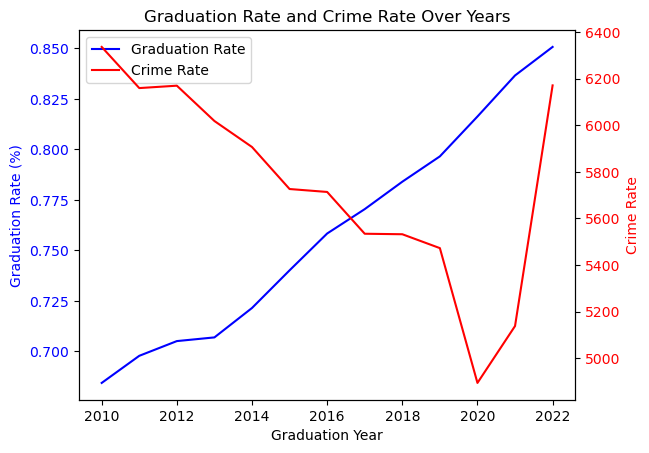

In [176]:

# Create figure and axes
fig, ax1 = plt.subplots()

# Plot graduation rate
ax1.plot(crime_rate_education_merge_total['graduation_year'], crime_rate_education_merge_total['graduation_rate'], color='b', label='Graduation Rate')
ax1.set_xlabel('Graduation Year')
ax1.set_ylabel('Graduation Rate (%)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create another y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot crime rate
ax2.plot(crime_rate_education_merge_total['graduation_year'], crime_rate_education_merge_total['crime_ratio'], color='r', label='Crime Rate')
ax2.set_ylabel('Crime Rate', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper left')

# Title
plt.title('Graduation Rate and Crime Rate Over Years')

# Show the plot
plt.show()
